# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 4.3: Teorema da convolução e filtragem

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

### Teorema da Convolução

Se $x, y, w\in\mathbb{C}^N$ onde $w=x*y$, então

\begin{equation*}
	W_k = X_k Y_k,\quad k= 0, 1, \dots, N-1
\end{equation*}

onde $X, Y, W\in\mathbb{C}^N$ são as DFT's de $x, y, w$, respectivamente.

**Prova:** Basta usar a definição da DFT:

\begin{align*}
	W_k &= \sum\limits_{n=0}^{N-1}w_ne^{-i2\pi kn/N} \\
	&= \sum\limits_{n=0}^{N-1}\left(\sum\limits_{m=0}^{N-1}x_my_{n-m}\right)e^{-i2\pi kn/N} \\
	&= \sum\limits_{m=0}^{N-1}\sum\limits_{r=-m}^{N-1-m}x_my_re^{-i2\pi k(r+m)/N} \\
	&= \sum\limits_{m=0}^{N-1}\sum\limits_{r=-m}^{N-1-m}x_my_re^{-i2\pi kr/N}e^{-i2\pi km/N}
\end{align*}

\begin{align*}
	W_k &= \sum\limits_{m=0}^{N-1}\sum\limits_{r=-m}^{N-1-m}x_my_re^{-i2\pi kr/N}e^{-i2\pi km/N} \\
	&= \left(\sum\limits_{m=0}^{N-1}x_me^{-i2\pi km/N}\right)\left(\sum\limits_{r=-m}^{N-1-m}y_re^{-i2\pi kr/N}\right) \\
	&= X_k\left(\sum\limits_{r=0}^{N-1}y_re^{-i2\pi kr/N}\right) \\
	&= X_kY_k
\end{align*}

### Ação de um filtro nas componentes do sinal

Considere um filtro arbitrário definido por um vetor de coeficientes $h\in\mathbb{C}^N$ com saída $y=x*h\in\mathbb{C}^N$:

$$x\longrightarrow\begin{array}{|c|}\hline h\\ \hline\end{array}\longrightarrow y=x*h$$

$$$$

$$$$

$$X\longrightarrow\begin{array}{|c|}\hline H\\ \hline\end{array}\longrightarrow Y=XH$$

Quando $x=E_{N,k}$, temos $X = (0, 0, \dots, 0, N, 0, \dots, 0)'$. Pelo teorema da convolução

\begin{equation*}
	Y = XH = (0, 0, \dots, 0, NH_k, 0, \dots, 0)'
\end{equation*}

Esta saída no domínio do tempo é

\begin{equation*}
	y = \frac{1}{N}\sum\limits_{r=0}^{N-1}Y_r E_{N,r} = H_kE_{N,k}.
\end{equation*}

In [2]:
import math
def baseEnk(N):
    n = np.arange(0,N,1)
    k = np.arange(0,N,1).reshape((N,1))
    return np.exp(1j*2*math.pi*k*n/N)

E4 = baseEnk(4)
np.round(np.fft.fft(E4[2]))

array([ 0.+0.j, -0.+0.j,  4.-0.j,  0.+0.j])

In [6]:
import math 
import scipy.fft as spfft

def build_h(N):
    ret = np.zeros(N)
    ret[0:2] = 0.5
    return ret

def conv1(x,y):
    N = len(x)
    w = np.zeros(N, dtype='complex')
    
    for n in range(N):
        for k in range(N):
            w[n] += x[k]*y[n-k]
    return w


def filtro(x):
    w = 0.5*x + 0.5*np.roll(x,1)
    return w

def test_conv1(dut, x):
    N = len(x)
    y = np.zeros(N)
    y[0:2] = 0.5
    
    golden = filtro(x)
    result = dut(x,y)
    
    assert np.allclose(golden, result) == True, f'Teste falhou \ndut={result} \ngolden={golden}'
    print('Teste passou!')

def test_conv2(dut, N):
    h = np.random.rand(N)
    t = np.arange(0,N,1)
    for k in range(N):
        
        Enk = np.exp(1j*2*math.pi*k*t/N)
        #print(np.round(spfft.fft(Enk),2))
        result = dut(Enk, h)
        H = spfft.fft(h)
        golden = H[k] * Enk
        
        assert np.allclose(golden, result) == True, 'Teste falhou'
    print('Teste passou')
        
        

test_conv1(conv1, np.random.rand(10))
test_conv2(conv1, 40)      


Teste passou!
Teste passou


In [4]:
def test_teorema_da_convolucao(N):
    x = np.random.rand(N)
    h = build_h(N)
    w1 = conv1(x,h)

    H = np.fft.fft(h)
    X = np.fft.fft(x)
    W = np.multiply(X,H)
    w2 = np.fft.ifft(W)
    
    assert np.allclose(w1,w2) == True , 'Teste falhou'
    print('Teste passou')

test_teorema_da_convolucao(10)

Teste passou


In [5]:
def test_teorma_da_convolucao2(N, verbose=False):
    Enk = baseEnk(N)
    h = np.zeros(N, dtype='complex')
    h[0:2] = 0.5
    
    H = np.fft.fft(h)
    
    if verbose:
        print(f'h={np.round(h,2)}')
        print(f'H={np.round(H,2)}\n')    
        
    for indice in range(N):
        x = Enk[indice]
        X = np.fft.fft(x)
        w = conv1(x,h)
        W = np.fft.fft(w)
        
        golden_W = np.zeros(N, dtype='complex')
        golden_W[indice] = N*H[indice]
        
        
        if verbose:
            print(f'[indice={indice}]')
            print(f'x={np.round(x,2)}')
            print(f'X={np.round(X,2)}\n')
            print(f'w={np.round(w,2)}')
            print(f'W={np.round(W,2)}')
            print(f'W[{indice}]={np.round(W[indice],2)} == N*H[{indice}]={np.round(N*H[indice],2)}\n')
        
        assert np.allclose(golden_W, W) == True, f'Teste falhou! indice={indice} \nW={np.round(W,2)} \ngolden_W={np.round(golden_W,2)}] '

    print('Teste passou!')
    
test_teorma_da_convolucao2(3, verbose=True)

h=[0.5+0.j 0.5+0.j 0. +0.j]
H=[1.  +0.j   0.25-0.43j 0.25+0.43j]

[indice=0]
x=[1.+0.j 1.+0.j 1.+0.j]
X=[3.+0.j 0.+0.j 0.+0.j]

w=[1.+0.j 1.+0.j 1.+0.j]
W=[3.+0.j 0.+0.j 0.+0.j]
W[0]=(3+0j) == N*H[0]=(3+0j)

[indice=1]
x=[ 1. +0.j   -0.5+0.87j -0.5-0.87j]
X=[-0.+0.j  3.-0.j  0.+0.j]

w=[ 0.25-0.43j  0.25+0.43j -0.5 +0.j  ]
W=[-0.  +0.j   0.75-1.3j -0.  +0.j ]
W[1]=(0.75-1.3j) == N*H[1]=(0.75-1.3j)

[indice=2]
x=[ 1. +0.j   -0.5-0.87j -0.5+0.87j]
X=[ 0.+0.j -0.+0.j  3.-0.j]

w=[ 0.25+0.43j  0.25-0.43j -0.5 +0.j  ]
W=[0.  +0.j  0.  +0.j  0.75+1.3j]
W[2]=(0.75+1.3j) == N*H[2]=(0.75+1.3j)

Teste passou!


Mas $y = x*h = M_h x = M_hE_{N,k}$, logo

\begin{equation*}
	M_hE_{N,k} = H_kE_{N,k}
\end{equation*}

Esta expressão mostra que os vetores $E_{N,k}$ são **autovetores** da matriz $M_h$ associada ao filtro, com correspondentes autovalores dados por $H_k$. 

In [34]:
def test_teorma_da_convolucao3(N, verbose=False):
    Enk = baseEnk(N)
    h = np.zeros(N, dtype='complex')
    h[0:2] = 0.5
    
    H = np.fft.fft(h)
    
    for indice in range(N):
        x = Enk[indice]
        w = conv1(x,h)

        HE = np.multiply(H[indice], x)
        
        print(f'w={np.round(w,2)}')
        print(f'he={np.round(HE,2)}')
        
        assert np.allclose(w, HE) == True, 'Teste falhou!'

    print('Teste passou!')

    
def test_eigenvectors_eigenvalues(N=4):
    h = np.zeros(N, dtype='complex')
    h[0:2] = 0.5
    
    H = spfft.fft(h)
    
    Mh = np.zeros((N,N), dtype='complex')
    for row in range(N):
        Mh[row] = np.roll(h, row -1)
    
    t = np.arange(0,N,1)
    
    print(f'Mh=\n{Mh}\n')
    print(f'H={H}\n')
    
    for k in range(N):
        Enk = np.exp(1j*2*math.pi*k*t/N)
        
        
        left = np.inner(Mh,Enk)
        right = H[k] * Enk
        print(f'k={k}')
        
        print(f'left \t= {left} ')
        print(f'right \t= {right}  \n')
        
        # Confirma que a multiplicação de matriz do lado esquerdo ({inner,dot}product) é equivalente a multiplicação por escalar do lado direito
        assert np.allclose(left, right) == True, 'Alguma diferença'
    
# test_teorma_da_convolucao3(3, verbose=True)
test_eigenvectors_eigenvalues(4)

Mh=
[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0.5+0.j 0.5+0.j]]

H=[1. +0.j  0.5-0.5j 0. +0.j  0.5+0.5j]

k=0
left 	= [1.+0.j 1.+0.j 1.+0.j 1.+0.j] 
right 	= [1.+0.j 1.+0.j 1.+0.j 1.+0.j]  

k=1
left 	= [ 0.5-0.5j  0.5+0.5j -0.5+0.5j -0.5-0.5j] 
right 	= [ 0.5-0.5j  0.5+0.5j -0.5+0.5j -0.5-0.5j]  

k=2
left 	= [0.+1.8369702e-16j 0.+6.1232340e-17j 0.-6.1232340e-17j 0.+6.1232340e-17j] 
right 	= [ 0.+0.j -0.+0.j  0.+0.j -0.+0.j]  

k=3
left 	= [ 0.5+0.5j  0.5-0.5j -0.5-0.5j -0.5+0.5j] 
right 	= [ 0.5+0.5j  0.5-0.5j -0.5-0.5j -0.5+0.5j]  



Cada componente $E_{N,k}$ de um sinal arbitrário é processada pelo filtro $H$ produzindo a saída

\begin{align*}
	y &= H_kE_{N,k} \\
	&= |H_k|e^{i(\measuredangle H_k)}\begin{pmatrix}
		\vdots \\ e^{i2\pi kn/N} \\ \vdots
	\end{pmatrix} \\
	&= |H_k|\begin{pmatrix}
		\vdots \\ e^{i(2\pi kn/N + \measuredangle H_k)} \\ \vdots
	\end{pmatrix}
\end{align*}

In [138]:
def test_conv3(dut, N):
    h = np.random.rand(N)
    t = np.arange(0,N,1)
    H = spfft.fft(h)
    for k in range(N):
        
        Enk = np.exp(1j*2*math.pi*k*t/N)
        #print(np.round(spfft.fft(Enk),2))
        result = dut(Enk, h)
        
        golden = H[k] * Enk
        
        golden_2 = np.abs(H[k]) * np.exp(1j*np.angle(H[k])) * Enk
        golden_3 = np.abs(H[k]) * np.exp(1j*(2*math.pi*k*t/N + np.angle(H[k], deg=False))) 

#         angle = np.arctan(H[k].real/H[k].imag)
        angle = np.arctan(H[k].imag/H[k].real)
#         angle = np.arccos(H[k].real/((H[k].real**2 + H[k].imag**2)**(1/2)) )
        print(f'angle={angle} np.angle={np.angle(H[k])}')
        
        assert np.allclose(golden, result) == True, 'Teste falhou'
        assert np.allclose(golden_2, result) == True, f'Teste falhou k={k} \ngolden=\t{np.round(golden_2,2)}, \nresult=\t{np.round(result,2)}'
        assert np.allclose(golden_3, result) == True, 'Teste falhou'
        
    print('Teste passou')
    
test_conv3(conv1, 40)

angle=-0.0 np.angle=-0.0
angle=-0.08533699881294551 np.angle=3.0562556547768476
angle=-0.08111632384504948 np.angle=3.060476329744744
angle=-1.3749347030778443 np.angle=-1.3749347030778443
angle=-0.9098572483315817 np.angle=2.2317354052582115
angle=-1.2915090541007113 np.angle=-1.2915090541007113
angle=-0.34391344765383347 np.angle=2.79767920593596
angle=1.429280525913086 np.angle=-1.712312127676707
angle=0.849254486848742 np.angle=-2.292338166741051
angle=0.2876377975979115 np.angle=0.2876377975979115
angle=-0.8961223027130306 np.angle=2.245470350876763
angle=-1.564084291770887 np.angle=1.577508361818906
angle=0.43696752754990015 np.angle=0.43696752754990015
angle=0.22488376956975237 np.angle=0.2248837695697524
angle=-1.136881281405129 np.angle=2.004711372184664
angle=-0.09340335860374087 np.angle=3.0481892949860523
angle=-1.3808341992973545 np.angle=-1.3808341992973545
angle=1.0573624697683233 np.angle=1.0573624697683233
angle=0.5293374610597467 np.angle=0.5293374610597467
angle=0.87

In [137]:
def test_multiplicao_por_complexo():
    complexo1 = np.random.rand(1) + 1.j * np.random.rand(1)
    complexo2 = np.random.rand(1) + 1.j * np.random.rand(1)
    
    print(f'complexo1={complexo1}')
    print(f'complexo2={complexo2}')    

    
    termo1 = complexo1 * complexo2
    termo2 = np.abs(complexo1) * np.exp(1j*np.angle(complexo1)) * complexo2
    print(f'termo1={termo1}')
    print(f'termo2={termo2}')

    angle1 = np.angle(complexo1)
    angle2 = np.arctan(complexo1.imag/complexo1.real)
    print(f'angle1={angle1}')
    print(f'angle2={angle2}')
    
    assert np.isclose(angle1,angle2) 
    
#     print(termo3)
test_multiplicao_por_complexo()
for trials in range(10000):
    test_multiplicao_por_complexo()


complexo1=[0.55682913+0.02884994j]
complexo2=[0.51550565+0.45084815j]
termo1=[0.27404162+0.26591769j]
termo2=[0.27404162+0.26591769j]
angle1=[0.05176483]
angle2=[0.05176483]
complexo1=[0.20486856+0.0926345j]
complexo2=[0.08822392+0.57469165j]
termo1=[-0.03516197+0.12590883j]
termo2=[-0.03516197+0.12590883j]
angle1=[0.42465334]
angle2=[0.42465334]
complexo1=[0.5519005+0.54868113j]
complexo2=[0.76717998+0.64241115j]
termo1=[0.07092813+0.77548421j]
termo2=[0.07092813+0.77548421j]
angle1=[0.78247302]
angle2=[0.78247302]
complexo1=[0.42344029+0.35456431j]
complexo2=[0.99403964+0.04845974j]
termo1=[0.40373435+0.37297078j]
termo2=[0.40373435+0.37297078j]
angle1=[0.69709934]
angle2=[0.69709934]
complexo1=[0.41091795+0.48190257j]
complexo2=[0.41215526+0.96342681j]
termo1=[-0.29491586+0.59450804j]
termo2=[-0.29491586+0.59450804j]
angle1=[0.86473731]
angle2=[0.86473731]
complexo1=[0.52143473+0.98470314j]
complexo2=[0.94557589+0.97757455j]
termo1=[-0.46956462+1.44085288j]
termo2=[-0.46956462+1.440

complexo1=[0.83459256+0.6321834j]
complexo2=[0.22680265+0.16144264j]
termo1=[0.08722645+0.2781197j]
termo2=[0.08722645+0.2781197j]
angle1=[0.64826827]
angle2=[0.64826827]
complexo1=[0.69249939+0.9413804j]
complexo2=[0.53834737+0.65600296j]
termo1=[-0.2447431+0.96107132j]
termo2=[-0.2447431+0.96107132j]
angle1=[0.93656134]
angle2=[0.93656134]
complexo1=[0.36778931+0.95815927j]
complexo2=[0.50874281+0.1526105j]
termo1=[0.040885+0.54358515j]
termo2=[0.040885+0.54358515j]
angle1=[1.20428953]
angle2=[1.20428953]
complexo1=[0.40370882+0.06620068j]
complexo2=[0.71713355+0.17551838j]
termo1=[0.2778937+0.11833305j]
termo2=[0.2778937+0.11833305j]
angle1=[0.16253472]
angle2=[0.16253472]
complexo1=[0.55395317+0.0403095j]
complexo2=[0.8240373+0.14184331j]
termo1=[0.45076044+0.11179108j]
termo2=[0.45076044+0.11179108j]
angle1=[0.07263895]
angle2=[0.07263895]
complexo1=[0.49116362+0.17942761j]
complexo2=[0.47481417+0.06350179j]
termo1=[0.22181747+0.11638454j]
termo2=[0.22181747+0.11638454j]
angle1=[0

complexo1=[0.06643095+0.88435779j]
complexo2=[0.10938645+0.95572629j]
termo1=[-0.83793734+0.16022657j]
termo2=[-0.83793734+0.16022657j]
angle1=[1.49581941]
angle2=[1.49581941]
complexo1=[0.86833817+0.24367679j]
complexo2=[0.9789597+0.51940888j]
termo1=[0.72350019+0.68957231j]
termo2=[0.72350019+0.68957231j]
angle1=[0.27358752]
angle2=[0.27358752]
complexo1=[0.84418125+0.43634415j]
complexo2=[0.9207931+0.70589477j]
termo1=[0.46930322+0.99768582j]
termo2=[0.46930322+0.99768582j]
angle1=[0.47706374]
angle2=[0.47706374]
complexo1=[0.17428906+0.06713466j]
complexo2=[0.45810069+0.45918458j]
termo1=[0.04901474+0.11078528j]
termo2=[0.04901474+0.11078528j]
angle1=[0.36767556]
angle2=[0.36767556]
complexo1=[0.2157406+0.71553326j]
complexo2=[0.04772467+0.45693905j]
termo1=[-0.31665894+0.13272889j]
termo2=[-0.31665894+0.13272889j]
angle1=[1.27795458]
angle2=[1.27795458]
complexo1=[0.45159289+0.51995353j]
complexo2=[0.61594672+0.47070473j]
termo1=[0.03341257+0.53283058j]
termo2=[0.03341257+0.532830

complexo1=[0.91374442+0.92868938j]
complexo2=[0.98135049+0.47049224j]
termo1=[0.45976239+1.34127944j]
termo2=[0.45976239+1.34127944j]
angle1=[0.79350952]
angle2=[0.79350952]
complexo1=[0.22410989+0.11309178j]
complexo2=[0.48428504+0.52717158j]
termo1=[0.04891429+0.17291302j]
termo2=[0.04891429+0.17291302j]
angle1=[0.46734192]
angle2=[0.46734192]
complexo1=[0.73776996+0.59961619j]
complexo2=[0.68468455+0.79534783j]
termo1=[0.02823626+0.99733168j]
termo2=[0.02823626+0.99733168j]
angle1=[0.68246195]
angle2=[0.68246195]
complexo1=[0.84374496+0.65422874j]
complexo2=[0.00649496+0.82989176j]
termo1=[-0.53745895+0.70446618j]
termo2=[-0.53745895+0.70446618j]
angle1=[0.6595517]
angle2=[0.6595517]
complexo1=[0.7838287+0.12126126j]
complexo2=[0.2098296+0.33233697j]
termo1=[0.12417086+0.28593946j]
termo2=[0.12417086+0.28593946j]
angle1=[0.15348701]
angle2=[0.15348701]
complexo1=[0.23672587+0.70400528j]
complexo2=[0.09519948+0.39287608j]
termo1=[-0.25405066+0.16002487j]
termo2=[-0.25405066+0.1600248

complexo1=[0.2875669+0.17865465j]
complexo2=[0.65542251+0.69651234j]
termo1=[0.06404265+0.31738817j]
termo2=[0.06404265+0.31738817j]
angle1=[0.55590746]
angle2=[0.55590746]
complexo1=[0.83975367+0.26923782j]
complexo2=[0.01934922+0.71269895j]
termo1=[-0.17563694+0.6037011j]
termo2=[-0.17563694+0.6037011j]
angle1=[0.31026093]
angle2=[0.31026093]
complexo1=[0.5043089+0.71575059j]
complexo2=[0.28486659+0.19018324j]
termo1=[0.00753699+0.29980453j]
termo2=[0.00753699+0.29980453j]
angle1=[0.95699815]
angle2=[0.95699815]
complexo1=[0.02054559+0.81696489j]
complexo2=[0.69251427+0.47399844j]
termo1=[-0.37301197+0.57549842j]
termo2=[-0.37301197+0.57549842j]
angle1=[1.54565295]
angle2=[1.54565295]
complexo1=[0.29490014+0.90827823j]
complexo2=[0.24585558+0.69877133j]
termo1=[-0.56217594+0.42937304j]
termo2=[-0.56217594+0.42937304j]
angle1=[1.25685352]
angle2=[1.25685352]
complexo1=[0.40199315+0.83063709j]
complexo2=[0.80719932+0.35750323j]
termo1=[0.02753315+0.81420354j]
termo2=[0.02753315+0.81420

complexo1=[0.0144897+0.90903515j]
complexo2=[0.00544361+0.44250286j]
termo1=[-0.40217178+0.01136017j]
termo2=[-0.40217178+0.01136017j]
angle1=[1.55485803]
angle2=[1.55485803]
complexo1=[0.09597967+0.02067846j]
complexo2=[0.7238499+0.7007185j]
termo1=[0.0549851+0.08222283j]
termo2=[0.0549851+0.08222283j]
angle1=[0.2122026]
angle2=[0.2122026]
complexo1=[0.20142899+0.67719531j]
complexo2=[0.43615604+0.7032114j]
termo1=[-0.38835699+0.43700998j]
termo2=[-0.38835699+0.43700998j]
angle1=[1.28168436]
angle2=[1.28168436]
complexo1=[0.83165744+0.07264728j]
complexo2=[0.04225612+0.82597491j]
termo1=[-0.02486221+0.68999797j]
termo2=[-0.02486221+0.68999797j]
angle1=[0.08713124]
angle2=[0.08713124]
complexo1=[0.20339271+0.21951279j]
complexo2=[0.5546351+0.3560355j]
termo1=[0.03465439+0.19416452j]
termo2=[0.03465439+0.19416452j]
angle1=[0.82349716]
angle2=[0.82349716]
complexo1=[0.04165741+0.35775113j]
complexo2=[0.17629643+0.35982601j]
termo1=[-0.12138411+0.07805967j]
termo2=[-0.12138411+0.07805967j

complexo1=[0.97871091+0.98191603j]
complexo2=[0.68826794+0.18739761j]
termo1=[0.48960662+0.85922941j]
termo2=[0.48960662+0.85922941j]
angle1=[0.78703291]
angle2=[0.78703291]
complexo1=[0.0465112+0.56282626j]
complexo2=[0.51363423+0.06449303j]
termo1=[-0.01240863+0.29208649j]
termo2=[-0.01240863+0.29208649j]
angle1=[1.48834502]
angle2=[1.48834502]
complexo1=[0.52988797+0.42901491j]
complexo2=[0.99949143+0.21560055j]
termo1=[0.43712264+0.54304086j]
termo2=[0.43712264+0.54304086j]
angle1=[0.68058732]
angle2=[0.68058732]
complexo1=[0.50351882+0.9353577j]
complexo2=[0.74707964+0.06213239j]
termo1=[0.31805265+0.73007153j]
termo2=[0.31805265+0.73007153j]
angle1=[1.07696712]
angle2=[1.07696712]
complexo1=[0.03905279+0.91443359j]
complexo2=[0.56062749+0.15001107j]
termo1=[-0.11528109+0.51851495j]
termo2=[-0.11528109+0.51851495j]
angle1=[1.52811519]
angle2=[1.52811519]
complexo1=[0.44417176+0.27440604j]
complexo2=[0.61829219+0.44400592j]
termo1=[0.15279002+0.366878j]
termo2=[0.15279002+0.366878j

complexo1=[0.69381791+0.93756317j]
complexo2=[0.15868046+0.66987503j]
termo1=[-0.51795482+0.61354424j]
termo2=[-0.51795482+0.61354424j]
angle1=[0.93371142]
angle2=[0.93371142]
complexo1=[0.50678579+0.70477358j]
complexo2=[0.08865369+0.36248749j]
termo1=[-0.21054318+0.24618428j]
termo2=[-0.21054318+0.24618428j]
angle1=[0.94738206]
angle2=[0.94738206]
complexo1=[0.1670288+0.50994082j]
complexo2=[0.70755994+0.03163064j]
termo1=[0.10205313+0.36609692j]
termo2=[0.10205313+0.36609692j]
angle1=[1.25426387]
angle2=[1.25426387]
complexo1=[0.53542592+0.42736049j]
complexo2=[0.14340102+0.84768173j]
termo1=[-0.28548506+0.5151547j]
termo2=[-0.28548506+0.5151547j]
angle1=[0.67362362]
angle2=[0.67362362]
complexo1=[0.68502372+0.34995316j]
complexo2=[0.73794347+0.21299837j]
termo1=[0.43096933+0.40415458j]
termo2=[0.43096933+0.40415458j]
angle1=[0.47230006]
angle2=[0.47230006]
complexo1=[0.41443509+0.29083435j]
complexo2=[0.42018986+0.16472945j]
termo1=[0.12623244+0.19047531j]
termo2=[0.12623244+0.1904

complexo1=[0.76063917+0.35626311j]
complexo2=[0.401872+0.0819616j]
termo1=[0.27647969+0.20551537j]
termo2=[0.27647969+0.20551537j]
angle1=[0.43802771]
angle2=[0.43802771]
complexo1=[0.52228326+0.18567449j]
complexo2=[0.48064131+0.74286661j]
termo1=[0.11309953+0.47722962j]
termo2=[0.11309953+0.47722962j]
angle1=[0.34157091]
angle2=[0.34157091]
complexo1=[0.49026052+0.50683683j]
complexo2=[0.71970467+0.79254004j]
termo1=[-0.0488457+0.75332392j]
termo2=[-0.0488457+0.75332392j]
angle1=[0.8020212]
angle2=[0.8020212]
complexo1=[0.55752077+0.17210662j]
complexo2=[0.35754561+0.39240544j]
termo1=[0.13180353+0.28031015j]
termo2=[0.13180353+0.28031015j]
angle1=[0.29941914]
angle2=[0.29941914]
complexo1=[0.11182418+0.54195993j]
complexo2=[0.34918958+0.90780557j]
termo1=[-0.4529464+0.29076138j]
termo2=[-0.4529464+0.29076138j]
angle1=[1.36731889]
angle2=[1.36731889]
complexo1=[0.14612325+0.16106815j]
complexo2=[0.21669862+0.68210696j]
termo1=[-0.078201+0.13457493j]
termo2=[-0.078201+0.13457493j]
ang

complexo1=[0.09513629+0.51824119j]
complexo2=[0.08573625+0.28868287j]
termo1=[-0.14145073+0.07189627j]
termo2=[-0.14145073+0.07189627j]
angle1=[1.38924245]
angle2=[1.38924245]
complexo1=[0.63231081+0.88824066j]
complexo2=[0.90866949+0.70672239j]
termo1=[-0.05317802+1.2539854j]
termo2=[-0.05317802+1.2539854j]
angle1=[0.95214906]
angle2=[0.95214906]
complexo1=[0.24515153+0.78224425j]
complexo2=[0.45368793+0.6008359j]
termo1=[-0.35877813+0.50219062j]
termo2=[-0.35877813+0.50219062j]
angle1=[1.26709618]
angle2=[1.26709618]
complexo1=[0.20856792+0.68575534j]
complexo2=[0.39289867+0.07477224j]
termo1=[0.03067059+0.28502746j]
termo2=[0.03067059+0.28502746j]
angle1=[1.27554266]
angle2=[1.27554266]
complexo1=[0.6033048+0.96667383j]
complexo2=[0.74201396+0.63254962j]
termo1=[-0.16380857+1.0989057j]
termo2=[-0.16380857+1.0989057j]
angle1=[1.01284173]
angle2=[1.01284173]
complexo1=[0.57224628+0.25574427j]
complexo2=[0.48835205+0.99951286j]
termo1=[0.02383796+0.69686076j]
termo2=[0.02383796+0.69686

complexo1=[0.82901843+0.99433195j]
complexo2=[0.75602683+0.81868011j]
termo1=[-0.18727961+1.43044253j]
termo2=[-0.18727961+1.43044253j]
angle1=[0.87581566]
angle2=[0.87581566]
complexo1=[0.76578923+0.04858718j]
complexo2=[0.56975843+0.15030209j]
termo1=[0.42901211+0.14278268j]
termo2=[0.42901211+0.14278268j]
angle1=[0.06336227]
angle2=[0.06336227]
complexo1=[0.89112428+0.1749185j]
complexo2=[0.80077695+0.05034982j]
termo1=[0.70478466+0.18493865j]
termo2=[0.70478466+0.18493865j]
angle1=[0.19382541]
angle2=[0.19382541]
complexo1=[0.27502692+0.6190201j]
complexo2=[0.43377688+0.87198831j]
termo1=[-0.42047797+0.50833686j]
termo2=[-0.42047797+0.50833686j]
angle1=[1.15269763]
angle2=[1.15269763]
complexo1=[0.00024675+0.5293728j]
complexo2=[0.54209803+0.15190104j]
termo1=[-0.08027851+0.28700943j]
termo2=[-0.08027851+0.28700943j]
angle1=[1.5703302]
angle2=[1.5703302]
complexo1=[0.38333432+0.0246534j]
complexo2=[0.35740746+0.20622744j]
termo1=[0.13192234+0.08786537j]
termo2=[0.13192234+0.0878653

complexo1=[0.00198833+0.13567088j]
complexo2=[0.58379304+0.30618803j]
termo1=[-0.04038003+0.07981252j]
termo2=[-0.04038003+0.07981252j]
angle1=[1.55614183]
angle2=[1.55614183]
complexo1=[0.09731985+0.40953977j]
complexo2=[0.53303074+0.70857117j]
termo1=[-0.2383136+0.28725532j]
termo2=[-0.2383136+0.28725532j]
angle1=[1.33749136]
angle2=[1.33749136]
complexo1=[0.30755555+0.90116171j]
complexo2=[0.76319795+0.4685844j]
termo1=[-0.18754455+0.83188051j]
termo2=[-0.18754455+0.83188051j]
angle1=[1.24190386]
angle2=[1.24190386]
complexo1=[0.45633912+0.21426917j]
complexo2=[0.42402806+0.83149735j]
termo1=[0.01533634+0.4703009j]
termo2=[0.01533634+0.4703009j]
angle1=[0.43898351]
angle2=[0.43898351]
complexo1=[0.81398124+0.85932918j]
complexo2=[0.81858419+0.96775485j]
termo1=[-0.16530781+1.49116757j]
termo2=[-0.16530781+1.49116757j]
angle1=[0.81249227]
angle2=[0.81249227]
complexo1=[0.84210445+0.63535175j]
complexo2=[0.50272237+0.86570206j]
termo1=[-0.12668056+1.04841709j]
termo2=[-0.12668056+1.04

complexo1=[0.49448797+0.13739211j]
complexo2=[0.87731712+0.96463513j]
termo1=[0.3012895+0.59753691j]
termo2=[0.3012895+0.59753691j]
angle1=[0.27101132]
angle2=[0.27101132]
complexo1=[0.12289907+0.07636102j]
complexo2=[0.13474278+0.54526784j]
termo1=[-0.02507745+0.07730201j]
termo2=[-0.02507745+0.07730201j]
angle1=[0.5559567]
angle2=[0.5559567]
complexo1=[0.16346018+0.42420201j]
complexo2=[0.96747915+0.63695413j]
termo1=[-0.1120529+0.51452323j]
termo2=[-0.1120529+0.51452323j]
angle1=[1.20299514]
angle2=[1.20299514]
complexo1=[0.06079209+0.65372413j]
complexo2=[0.03298729+0.09835423j]
termo1=[-0.06229116+0.02754375j]
termo2=[-0.06229116+0.02754375j]
angle1=[1.47806951]
angle2=[1.47806951]
complexo1=[0.22276695+0.72626659j]
complexo2=[0.80189346+0.33364999j]
termo1=[-0.06368348+0.65671462j]
termo2=[-0.06368348+0.65671462j]
angle1=[1.27317772]
angle2=[1.27317772]
complexo1=[0.0900706+0.73580621j]
complexo2=[0.97652183+0.85329413j]
termo1=[-0.53990322+0.79538754j]
termo2=[-0.53990322+0.7953

complexo1=[0.1189359+0.60166122j]
complexo2=[0.2400099+0.94740588j]
termo1=[-0.54147158+0.25708522j]
termo2=[-0.54147158+0.25708522j]
angle1=[1.37563331]
angle2=[1.37563331]
complexo1=[0.12177887+0.94738713j]
complexo2=[0.37786807+0.74499707j]
termo1=[-0.65978429+0.44871226j]
termo2=[-0.65978429+0.44871226j]
angle1=[1.44295553]
angle2=[1.44295553]
complexo1=[0.84942207+0.45511422j]
complexo2=[0.70727256+0.45303472j]
termo1=[0.39459038+0.70670749j]
termo2=[0.39459038+0.70670749j]
angle1=[0.49187017]
angle2=[0.49187017]
complexo1=[0.92039955+0.57165514j]
complexo2=[0.31762502+0.89616647j]
termo1=[-0.21995624+1.00640319j]
termo2=[-0.21995624+1.00640319j]
angle1=[0.55578597]
angle2=[0.55578597]
complexo1=[0.84723423+0.43486794j]
complexo2=[0.13831485+0.17313605j]
termo1=[0.04189376+0.20683549j]
termo2=[0.04189376+0.20683549j]
angle1=[0.47421466]
angle2=[0.47421466]
complexo1=[0.03575308+0.03403702j]
complexo2=[0.1661785+0.06930014j]
termo1=[0.00358262+0.00813392j]
termo2=[0.00358262+0.0081

complexo1=[0.59061973+0.85336555j]
complexo2=[0.88466987+0.66177084j]
termo1=[-0.04222896+1.1458017j]
termo2=[-0.04222896+1.1458017j]
angle1=[0.96538777]
angle2=[0.96538777]
complexo1=[0.67940667+0.71356284j]
complexo2=[0.11329258+0.97672193j]
termo1=[-0.61998073+0.74443277j]
termo2=[-0.61998073+0.74443277j]
angle1=[0.80991365]
angle2=[0.80991365]
complexo1=[0.16584382+0.48190053j]
complexo2=[0.99641573+0.33200139j]
termo1=[0.00525775+0.53523364j]
termo2=[0.00525775+0.53523364j]
angle1=[1.23934672]
angle2=[1.23934672]
complexo1=[0.74707204+0.03906566j]
complexo2=[0.35441104+0.3674553j]
termo1=[0.25041569+0.28836088j]
termo2=[0.25041569+0.28836088j]
angle1=[0.05224411]
angle2=[0.05224411]
complexo1=[0.81159197+0.52273409j]
complexo2=[0.53125182+0.47416292j]
termo1=[0.18329859+0.66253026j]
termo2=[0.18329859+0.66253026j]
angle1=[0.57220569]
angle2=[0.57220569]
complexo1=[0.23243344+0.72002006j]
complexo2=[0.26546202+0.01005983j]
termo1=[0.05445898+0.19347622j]
termo2=[0.05445898+0.193476

complexo1=[0.74129283+0.96709727j]
complexo2=[0.08447281+0.82110602j]
termo1=[-0.7314703+0.69037343j]
termo2=[-0.7314703+0.69037343j]
angle1=[0.91681026]
angle2=[0.91681026]
complexo1=[0.85462935+0.97182118j]
complexo2=[0.84627136+0.83608952j]
termo1=[-0.08928116+1.53697108j]
termo2=[-0.08928116+1.53697108j]
angle1=[0.84947403]
angle2=[0.84947403]
complexo1=[0.71980268+0.50274725j]
complexo2=[0.25032812+0.03795915j]
termo1=[0.16110299+0.15317487j]
termo2=[0.16110299+0.15317487j]
angle1=[0.60968593]
angle2=[0.60968593]
complexo1=[0.9265376+0.793399j]
complexo2=[0.35626879+0.66631172j]
termo1=[-0.19855462+0.90002616j]
termo2=[-0.19855462+0.90002616j]
angle1=[0.70814321]
angle2=[0.70814321]
complexo1=[0.42360486+0.19463149j]
complexo2=[0.86668074+0.03431871j]
termo1=[0.36045067+0.18322093j]
termo2=[0.36045067+0.18322093j]
angle1=[0.43069686]
angle2=[0.43069686]
complexo1=[0.72494676+0.18197869j]
complexo2=[0.60354017+0.98947316j]
termo1=[0.25747146+0.82714681j]
termo2=[0.25747146+0.827146

complexo1=[0.00058978+0.86069689j]
complexo2=[0.67901931+0.52932285j]
termo1=[-0.45518606+0.58474199j]
termo2=[-0.45518606+0.58474199j]
angle1=[1.5701111]
angle2=[1.5701111]
complexo1=[0.77340554+0.31657267j]
complexo2=[0.77189413+0.3360301j]
termo1=[0.49060925+0.50424813j]
termo2=[0.49060925+0.50424813j]
angle1=[0.38851752]
angle2=[0.38851752]
complexo1=[0.27198034+0.41537349j]
complexo2=[0.73321419+0.76693136j]
termo1=[-0.11914311+0.51314799j]
termo2=[-0.11914311+0.51314799j]
angle1=[0.99106465]
angle2=[0.99106465]
complexo1=[0.06055266+0.07846325j]
complexo2=[0.63258205+0.87069223j]
termo1=[-0.03001282+0.10235717j]
termo2=[-0.03001282+0.10235717j]
angle1=[0.91353075]
angle2=[0.91353075]
complexo1=[0.60183054+0.47561156j]
complexo2=[0.36849884+0.00814272j]
termo1=[0.21790108+0.18016284j]
termo2=[0.21790108+0.18016284j]
angle1=[0.6687828]
angle2=[0.6687828]
complexo1=[0.29556453+0.88888166j]
complexo2=[0.01142217+0.97751205j]
termo1=[-0.86551655+0.29907084j]
termo2=[-0.86551655+0.2990

complexo1=[0.41708093+0.23289726j]
complexo2=[0.86840692+0.18044385j]
termo1=[0.32017109+0.27750928j]
termo2=[0.32017109+0.27750928j]
angle1=[0.50926813]
angle2=[0.50926813]
complexo1=[0.31957054+0.58857746j]
complexo2=[0.60997138+0.41186598j]
termo1=[-0.04748615+0.49063564j]
termo2=[-0.04748615+0.49063564j]
angle1=[1.07337874]
angle2=[1.07337874]
complexo1=[0.63710205+0.95059054j]
complexo2=[0.22017275+0.16258864j]
termo1=[-0.01428271+0.31287969j]
termo2=[-0.01428271+0.31287969j]
angle1=[0.98033974]
angle2=[0.98033974]
complexo1=[0.44813318+0.63121682j]
complexo2=[0.29643703+0.74850395j]
termo1=[-0.33962501+0.5225455j]
termo2=[-0.33962501+0.5225455j]
angle1=[0.95342283]
angle2=[0.95342283]
complexo1=[0.14791917+0.57651968j]
complexo2=[0.40970217+0.42328311j]
termo1=[-0.18342824+0.29881305j]
termo2=[-0.18342824+0.29881305j]
angle1=[1.31964129]
angle2=[1.31964129]
complexo1=[0.86941207+0.70542021j]
complexo2=[0.14450279+0.81547466j]
termo1=[-0.44961983+0.8109187j]
termo2=[-0.44961983+0.

complexo1=[0.64837188+0.28758876j]
complexo2=[0.03586179+0.70363993j]
termo1=[-0.17910716+0.4665338j]
termo2=[-0.17910716+0.4665338j]
angle1=[0.41748157]
angle2=[0.41748157]
complexo1=[0.23478609+0.57690555j]
complexo2=[0.91057807+0.43148715j]
termo1=[-0.03513627+0.62662472j]
termo2=[-0.03513627+0.62662472j]
angle1=[1.18429159]
angle2=[1.18429159]
complexo1=[0.24961678+0.65465054j]
complexo2=[0.47367619+0.83451505j]
termo1=[-0.4280782+0.51840134j]
termo2=[-0.4280782+0.51840134j]
angle1=[1.2065158]
angle2=[1.2065158]
complexo1=[0.80144591+0.87115965j]
complexo2=[0.84909529+0.85991664j]
termo1=[-0.06862073+1.42887423j]
termo2=[-0.06862073+1.42887423j]
angle1=[0.82705378]
angle2=[0.82705378]
complexo1=[0.84489511+0.89342018j]
complexo2=[0.86991904+0.16244727j]
termo1=[0.58985668+0.91445413j]
termo2=[0.58985668+0.91445413j]
angle1=[0.81330591]
angle2=[0.81330591]
complexo1=[0.24583228+0.8505824j]
complexo2=[0.00935867+0.83732838j]
termo1=[-0.70991612+0.21380267j]
termo2=[-0.70991612+0.2138

complexo1=[0.69501154+0.50410402j]
complexo2=[0.68385057+0.97768655j]
termo1=[-0.01757169+1.02423525j]
termo2=[-0.01757169+1.02423525j]
angle1=[0.62751627]
angle2=[0.62751627]
complexo1=[0.61218659+0.4174258j]
complexo2=[0.41231173+0.14503117j]
termo1=[0.19187196+0.26089569j]
termo2=[0.19187196+0.26089569j]
angle1=[0.59844772]
angle2=[0.59844772]
complexo1=[0.02275852+0.04080417j]
complexo2=[0.00738522+0.38067988j]
termo1=[-0.01536525+0.00896506j]
termo2=[-0.01536525+0.00896506j]
angle1=[1.06202256]
angle2=[1.06202256]
complexo1=[0.56080272+0.80641589j]
complexo2=[0.83941609+0.11165012j]
termo1=[0.38071039+0.73953216j]
termo2=[0.38071039+0.73953216j]
angle1=[0.96314665]
angle2=[0.96314665]
complexo1=[0.0587219+0.8588256j]
complexo2=[0.7651924+0.30935356j]
termo1=[-0.2207472+0.67533265j]
termo2=[-0.2207472+0.67533265j]
angle1=[1.50252793]
angle2=[1.50252793]
complexo1=[0.31832525+0.00205612j]
complexo2=[0.00163392+0.58157055j]
termo1=[-0.00067566+0.18513195j]
termo2=[-0.00067566+0.18513

complexo1=[0.34921095+0.48167843j]
complexo2=[0.55703778+0.73290752j]
termo1=[-0.15850205+0.52425241j]
termo2=[-0.15850205+0.52425241j]
angle1=[0.94349617]
angle2=[0.94349617]
complexo1=[0.92016129+0.05355794j]
complexo2=[0.0790216+0.77003376j]
termo1=[0.0314712+0.71278749j]
termo2=[0.0314712+0.71278749j]
angle1=[0.05813935]
angle2=[0.05813935]
complexo1=[0.96296495+0.3937757j]
complexo2=[0.94615584+0.5344429j]
termo1=[0.70066428+0.88722295j]
termo2=[0.70066428+0.88722295j]
angle1=[0.38817236]
angle2=[0.38817236]
complexo1=[0.64163989+0.59337161j]
complexo2=[0.96741103+0.89286839j]
termo1=[0.09092675+1.14693422j]
termo2=[0.09092675+1.14693422j]
angle1=[0.74633479]
angle2=[0.74633479]
complexo1=[0.88700932+0.88780772j]
complexo2=[0.62990497+0.81720312j]
termo1=[-0.16678766+1.28410128j]
termo2=[-0.16678766+1.28410128j]
angle1=[0.78584802]
angle2=[0.78584802]
complexo1=[0.41277318+0.22541298j]
complexo2=[0.44123871+0.82950433j]
termo1=[-0.00484953+0.44185807j]
termo2=[-0.00484953+0.441858

complexo1=[0.37578738+0.08563158j]
complexo2=[0.6244819+0.39660101j]
termo1=[0.20071085+0.20251303j]
termo2=[0.20071085+0.20251303j]
angle1=[0.22404677]
angle2=[0.22404677]
complexo1=[0.20460558+0.28596688j]
complexo2=[0.76889298+0.01813668j]
termo1=[0.15213331+0.2235888j]
termo2=[0.15213331+0.2235888j]
angle1=[0.94975187]
angle2=[0.94975187]
complexo1=[0.23565531+0.64270179j]
complexo2=[0.17331186+0.95094152j]
termo1=[-0.57032996+0.33548226j]
termo2=[-0.57032996+0.33548226j]
angle1=[1.2193543]
angle2=[1.2193543]
complexo1=[0.63810498+0.96356102j]
complexo2=[0.08113071+0.01101462j]
termo1=[0.04115665+0.08520288j]
termo2=[0.04115665+0.08520288j]
angle1=[0.98586725]
angle2=[0.98586725]
complexo1=[0.61528202+0.77197841j]
complexo2=[0.118221+0.02681274j]
termo1=[0.0520404+0.10776145j]
termo2=[0.0520404+0.10776145j]
angle1=[0.89787527]
angle2=[0.89787527]
complexo1=[0.50440602+0.18227801j]
complexo2=[0.29556352+0.32947753j]
termo1=[0.08902751+0.22006518j]
termo2=[0.08902751+0.22006518j]
ang

termo1=[-0.19838666+0.63996665j]
termo2=[-0.19838666+0.63996665j]
angle1=[0.59444557]
angle2=[0.59444557]
complexo1=[0.63167004+0.06111207j]
complexo2=[0.50323905+0.01073534j]
termo1=[0.31722497+0.03753517j]
termo2=[0.31722497+0.03753517j]
angle1=[0.09644665]
angle2=[0.09644665]
complexo1=[0.22304075+0.32812172j]
complexo2=[0.54008873+0.79159162j]
termo1=[-0.13927661+0.35377203j]
termo2=[-0.13927661+0.35377203j]
angle1=[0.97379061]
angle2=[0.97379061]
complexo1=[0.64224709+0.52358451j]
complexo2=[0.24653423+0.01116406j]
termo1=[0.15249056+0.13625159j]
termo2=[0.15249056+0.13625159j]
angle1=[0.68396384]
angle2=[0.68396384]
complexo1=[0.92723482+0.59820006j]
complexo2=[0.95607191+0.07332691j]
termo1=[0.842639+0.63991353j]
termo2=[0.842639+0.63991353j]
angle1=[0.57295399]
angle2=[0.57295399]
complexo1=[0.40858318+0.73753139j]
complexo2=[0.02247153+0.4026266j]
termo1=[-0.28776827+0.18107991j]
termo2=[-0.28776827+0.18107991j]
angle1=[1.06489684]
angle2=[1.06489684]
complexo1=[0.23222892+0.4

complexo1=[0.57986413+0.01606497j]
complexo2=[0.05270816+0.2620079j]
termo1=[0.02635442+0.15277574j]
termo2=[0.02635442+0.15277574j]
angle1=[0.02769763]
angle2=[0.02769763]
complexo1=[0.81947885+0.655648j]
complexo2=[0.29780496+0.91795506j]
termo1=[-0.35781053+0.94749998j]
termo2=[-0.35781053+0.94749998j]
angle1=[0.67478925]
angle2=[0.67478925]
complexo1=[0.98825879+0.72335971j]
complexo2=[0.91887682+0.51305924j]
termo1=[0.53696171+1.17171377j]
termo2=[0.53696171+1.17171377j]
angle1=[0.6318511]
angle2=[0.6318511]
complexo1=[0.30953998+0.52651009j]
complexo2=[0.92875754+0.77268815j]
termo1=[-0.11934051+0.72817809j]
termo2=[-0.11934051+0.72817809j]
angle1=[1.03931476]
angle2=[1.03931476]
complexo1=[0.44022521+0.91312792j]
complexo2=[0.7804477+0.70422236j]
termo1=[-0.29947235+1.02266502j]
termo2=[-0.29947235+1.02266502j]
angle1=[1.12156544]
angle2=[1.12156544]
complexo1=[0.3683021+0.92702662j]
complexo2=[0.63000149+0.2692322j]
termo1=[-0.01755454+0.68318693j]
termo2=[-0.01755454+0.6831869

complexo1=[0.72294805+0.41849018j]
complexo2=[0.28248991+0.63719141j]
termo1=[-0.06243282+0.57887554j]
termo2=[-0.06243282+0.57887554j]
angle1=[0.52473496]
angle2=[0.52473496]
complexo1=[0.78520009+0.59502862j]
complexo2=[0.64541387+0.31221924j]
termo1=[0.32099964+0.6291943j]
termo2=[0.32099964+0.6291943j]
angle1=[0.64847767]
angle2=[0.64847767]
complexo1=[0.97274039+0.98306495j]
complexo2=[0.85857679+0.54033829j]
termo1=[0.30398469+1.36964563j]
termo2=[0.30398469+1.36964563j]
angle1=[0.79067705]
angle2=[0.79067705]
complexo1=[0.90638939+0.68254458j]
complexo2=[0.61763273+0.95236245j]
termo1=[-0.09021407+1.28477309j]
termo2=[-0.09021407+1.28477309j]
angle1=[0.64544184]
angle2=[0.64544184]
complexo1=[0.82727783+0.0143811j]
complexo2=[0.90087349+0.46564146j]
termo1=[0.73857623+0.39817041j]
termo2=[0.73857623+0.39817041j]
angle1=[0.01738189]
angle2=[0.01738189]
complexo1=[0.16817127+0.61690121j]
complexo2=[0.85214849+0.76209898j]
termo1=[-0.32683289+0.65385459j]
termo2=[-0.32683289+0.6538

complexo1=[0.54000427+0.75532559j]
complexo2=[0.79441452+0.21999172j]
termo1=[0.26282186+0.71883809j]
termo2=[0.26282186+0.71883809j]
angle1=[0.95012093]
angle2=[0.95012093]
complexo1=[0.42271966+0.8357718j]
complexo2=[0.77992727+0.11517811j]
termo1=[0.23342798+0.70052927j]
termo2=[0.23342798+0.70052927j]
angle1=[1.10253256]
angle2=[1.10253256]
complexo1=[0.27740976+0.81530738j]
complexo2=[0.13552049+0.52952453j]
termo1=[-0.39413056+0.25738613j]
termo2=[-0.39413056+0.25738613j]
angle1=[1.24283218]
angle2=[1.24283218]
complexo1=[0.12368645+0.94631675j]
complexo2=[0.49616429+0.80984325j]
termo1=[-0.70499943+0.56969522j]
termo2=[-0.70499943+0.56969522j]
angle1=[1.44083005]
angle2=[1.44083005]
complexo1=[0.28539181+0.03775647j]
complexo2=[0.6260128+0.83774265j]
termo1=[0.14702872+0.26272092j]
termo2=[0.14702872+0.26272092j]
angle1=[0.13153312]
angle2=[0.13153312]
complexo1=[0.53039615+0.9916605j]
complexo2=[0.14277497+0.23923524j]
termo1=[-0.16151284+0.26847375j]
termo2=[-0.16151284+0.2684

complexo1=[0.71471028+0.70729207j]
complexo2=[0.61137475+0.07088341j]
termo1=[0.38682054+0.48308162j]
termo2=[0.38682054+0.48308162j]
angle1=[0.78018148]
angle2=[0.78018148]
complexo1=[0.14744142+0.54881734j]
complexo2=[0.69313707+0.16099267j]
termo1=[0.01384155+0.40414263j]
termo2=[0.01384155+0.40414263j]
angle1=[1.30834041]
angle2=[1.30834041]
complexo1=[0.70597966+0.4084666j]
complexo2=[0.03840248+0.21822469j]
termo1=[-0.06202613+0.16974832j]
termo2=[-0.06202613+0.16974832j]
angle1=[0.52452153]
angle2=[0.52452153]
complexo1=[0.09978252+0.67173827j]
complexo2=[0.56155886+0.28803898j]
termo1=[-0.13745305+0.40596184j]
termo2=[-0.13745305+0.40596184j]
angle1=[1.42333089]
angle2=[1.42333089]
complexo1=[0.23539077+0.92278884j]
complexo2=[0.04219682+0.81650107j]
termo1=[-0.74352533+0.23113556j]
termo2=[-0.74352533+0.23113556j]
angle1=[1.32103634]
angle2=[1.32103634]
complexo1=[0.7911841+0.78431332j]
complexo2=[0.18593271+0.77474646j]
termo1=[-0.46053696+0.75879658j]
termo2=[-0.46053696+0.7

complexo1=[0.19963009+0.61459966j]
complexo2=[0.60532363+0.54674197j]
termo1=[-0.21518662+0.48117784j]
termo2=[-0.21518662+0.48117784j]
angle1=[1.25673338]
angle2=[1.25673338]
complexo1=[0.9793437+0.15715579j]
complexo2=[0.49347962+0.76500984j]
termo1=[0.36306043+0.82676075j]
termo2=[0.36306043+0.82676075j]
angle1=[0.159114]
angle2=[0.159114]
complexo1=[0.36591079+0.46615492j]
complexo2=[0.78830361+0.06849749j]
termo1=[0.25651836+0.39253558j]
termo2=[0.25651836+0.39253558j]
angle1=[0.90529652]
angle2=[0.90529652]
complexo1=[0.24015026+0.54395106j]
complexo2=[0.96355111+0.47010457j]
termo1=[-0.02431682+0.63702038j]
termo2=[-0.02431682+0.63702038j]
angle1=[1.1550398]
angle2=[1.1550398]
complexo1=[0.28414003+0.04139869j]
complexo2=[0.8672063+0.75974084j]
termo1=[0.21495575+0.25177398j]
termo2=[0.21495575+0.25177398j]
angle1=[0.14468017]
angle2=[0.14468017]
complexo1=[0.88304952+0.20524984j]
complexo2=[0.20605826+0.62786025j]
termo1=[0.05309143+0.59672511j]
termo2=[0.05309143+0.59672511j]


complexo1=[0.67613429+0.32932935j]
complexo2=[0.56596411+0.20206452j]
termo1=[0.31612196+0.32301135j]
termo2=[0.31612196+0.32301135j]
angle1=[0.45325574]
angle2=[0.45325574]
complexo1=[0.47822447+0.19976438j]
complexo2=[0.41411897+0.9275751j]
termo1=[0.01274536+0.52631533j]
termo2=[0.01274536+0.52631533j]
angle1=[0.3956891]
angle2=[0.3956891]
complexo1=[0.88195569+0.64279933j]
complexo2=[0.98871949+0.88197641j]
termo1=[0.30507294+1.41341233j]
termo2=[0.30507294+1.41341233j]
angle1=[0.62981671]
angle2=[0.62981671]
complexo1=[0.33842526+0.60919718j]
complexo2=[0.20308869+0.02086054j]
termo1=[0.05602216+0.13078079j]
termo2=[0.05602216+0.13078079j]
angle1=[1.06371993]
angle2=[1.06371993]
complexo1=[0.33518323+0.27121248j]
complexo2=[0.36451906+0.81262952j]
termo1=[-0.0982146+0.3712419j]
termo2=[-0.0982146+0.3712419j]
angle1=[0.68029351]
angle2=[0.68029351]
complexo1=[0.30414201+0.82100209j]
complexo2=[0.47351158+0.71109082j]
termo1=[-0.43979228+0.60502659j]
termo2=[-0.43979228+0.60502659j]

termo1=[-0.34790234+0.67948973j]
termo2=[-0.34790234+0.67948973j]
angle1=[1.11078711]
angle2=[1.11078711]
complexo1=[0.83364148+0.62945701j]
complexo2=[0.71310074+0.9880285j]
termo1=[-0.02745111+1.2725278j]
termo2=[-0.02745111+1.2725278j]
angle1=[0.64673751]
angle2=[0.64673751]
complexo1=[0.35243694+0.74513157j]
complexo2=[0.45303823+0.90629453j]
termo1=[-0.51564126+0.65698476j]
termo2=[-0.51564126+0.65698476j]
angle1=[1.12899236]
angle2=[1.12899236]
complexo1=[0.07605414+0.67818229j]
complexo2=[0.27661622+0.295694j]
termo1=[-0.17949663+0.21008497j]
termo2=[-0.17949663+0.21008497j]
angle1=[1.45911883]
angle2=[1.45911883]
complexo1=[0.61939112+0.41699785j]
complexo2=[0.42064705+0.96129277j]
termo1=[-0.14031197+0.77082511j]
termo2=[-0.14031197+0.77082511j]
angle1=[0.59253844]
angle2=[0.59253844]
complexo1=[0.55451689+0.31329567j]
complexo2=[0.84485964+0.53580218j]
termo1=[0.30062445+0.56180223j]
termo2=[0.30062445+0.56180223j]
angle1=[0.51427782]
angle2=[0.51427782]
complexo1=[0.92904158

complexo1=[0.07352401+0.70770554j]
complexo2=[0.18635597+0.4149781j]
termo1=[-0.27998067+0.16239601j]
termo2=[-0.27998067+0.16239601j]
angle1=[1.46727702]
angle2=[1.46727702]
complexo1=[0.76064621+0.45007782j]
complexo2=[0.16485401+0.6789843j]
termo1=[-0.18020019+0.59066397j]
termo2=[-0.18020019+0.59066397j]
angle1=[0.53429757]
angle2=[0.53429757]
complexo1=[0.09019927+0.10264432j]
complexo2=[0.80218514+0.13838999j]
termo1=[0.05815157+0.09482243j]
termo2=[0.05815157+0.09482243j]
angle1=[0.84984323]
angle2=[0.84984323]
complexo1=[0.25994975+0.26412647j]
complexo2=[0.2828766+0.83446488j]
termo1=[-0.14687056+0.29163414j]
termo2=[-0.14687056+0.29163414j]
angle1=[0.79336766]
angle2=[0.79336766]
complexo1=[0.94420182+0.64842006j]
complexo2=[0.79003777+0.54628677j]
termo1=[0.3917318+1.02808129j]
termo2=[0.3917318+1.02808129j]
angle1=[0.6017703]
angle2=[0.6017703]
complexo1=[0.65119479+0.76834941j]
complexo2=[0.23281409+0.49905663j]
termo1=[-0.23184255+0.50386565j]
termo2=[-0.23184255+0.503865

complexo1=[0.62725197+0.91783473j]
complexo2=[0.30372121+0.58072776j]
termo1=[-0.34250238+0.64302851j]
termo2=[-0.34250238+0.64302851j]
angle1=[0.97129564]
angle2=[0.97129564]
complexo1=[0.51617406+0.35402578j]
complexo2=[0.8822505+0.51191907j]
termo1=[0.27416227+0.57657876j]
termo2=[0.27416227+0.57657876j]
angle1=[0.60117634]
angle2=[0.60117634]
complexo1=[0.16906606+0.65275536j]
complexo2=[0.72190183+0.23265982j]
termo1=[-0.02982084+0.51056017j]
termo2=[-0.02982084+0.51056017j]
angle1=[1.3173617]
angle2=[1.3173617]
complexo1=[0.05064305+0.258543j]
complexo2=[0.65819558+0.8928352j]
termo1=[-0.19750326+0.21538775j]
termo2=[-0.19750326+0.21538775j]
angle1=[1.37736675]
angle2=[1.37736675]
complexo1=[0.28101508+0.47457903j]
complexo2=[0.62214779+0.60489178j]
termo1=[-0.11223604+0.46524201j]
termo2=[-0.11223604+0.46524201j]
angle1=[1.03617964]
angle2=[1.03617964]
complexo1=[0.8445501+0.03833086j]
complexo2=[0.49416588+0.00629227j]
termo1=[0.41710666+0.02425594j]
termo2=[0.41710666+0.024255

termo1=[-0.15848934+0.3171165j]
termo2=[-0.15848934+0.3171165j]
angle1=[0.6478668]
angle2=[0.6478668]
complexo1=[0.93268518+0.85620199j]
complexo2=[0.11303225+0.16002243j]
termo1=[-0.03158802+0.24602899j]
termo2=[-0.03158802+0.24602899j]
angle1=[0.74266956]
angle2=[0.74266956]
complexo1=[0.39314486+0.23465177j]
complexo2=[0.38214197+0.10866242j]
termo1=[0.12473932+0.13239036j]
termo2=[0.12473932+0.13239036j]
angle1=[0.53810622]
angle2=[0.53810622]
complexo1=[0.21866917+0.89362382j]
complexo2=[0.89748558+0.45100821j]
termo1=[-0.20677925+0.90063609j]
termo2=[-0.20677925+0.90063609j]
angle1=[1.33081269]
angle2=[1.33081269]
complexo1=[0.22221286+0.69566907j]
complexo2=[0.98826801+0.54383045j]
termo1=[-0.15872017+0.80835361j]
termo2=[-0.15872017+0.80835361j]
angle1=[1.26161667]
angle2=[1.26161667]
complexo1=[0.12716758+0.84581808j]
complexo2=[0.14983081+0.15478822j]
termo1=[-0.11186905+0.14641365j]
termo2=[-0.11186905+0.14641365j]
angle1=[1.42156545]
angle2=[1.42156545]
complexo1=[0.9620229

complexo1=[0.29019387+0.69374624j]
complexo2=[0.34935835+0.10652296j]
termo1=[0.02748175+0.27327835j]
termo2=[0.02748175+0.27327835j]
angle1=[1.17461452]
angle2=[1.17461452]
complexo1=[0.00291603+0.39976374j]
complexo2=[0.00638073+0.50324574j]
termo1=[-0.20116079+0.00401826j]
termo2=[-0.20116079+0.00401826j]
angle1=[1.56350207]
angle2=[1.56350207]
complexo1=[0.91277917+0.87426632j]
complexo2=[0.54428359+0.74205284j]
termo1=[-0.15194108+1.15317919j]
termo2=[-0.15194108+1.15317919j]
angle1=[0.76385037]
angle2=[0.76385037]
complexo1=[0.22328777+0.87653476j]
complexo2=[0.1976853+0.52525253j]
termo1=[-0.4162614+0.29056051j]
termo2=[-0.4162614+0.29056051j]
angle1=[1.32136223]
angle2=[1.32136223]
complexo1=[0.30330184+0.49263666j]
complexo2=[0.11798955+0.98632172j]
termo1=[-0.45011179+0.35727917j]
termo2=[-0.45011179+0.35727917j]
angle1=[1.01893404]
angle2=[1.01893404]
complexo1=[0.39717274+0.16278468j]
complexo2=[0.47278353+0.91800109j]
termo1=[0.03834021+0.44156692j]
termo2=[0.03834021+0.44

complexo1=[0.80666816+0.36652321j]
complexo2=[0.8510455+0.16537186j]
termo1=[0.62589868+0.44532813j]
termo2=[0.62589868+0.44532813j]
angle1=[0.4264794]
angle2=[0.4264794]
complexo1=[0.13526308+0.12060901j]
complexo2=[0.99596478+0.70016895j]
termo1=[0.05027058+0.21482933j]
termo2=[0.05027058+0.21482933j]
angle1=[0.7281896]
angle2=[0.7281896]
complexo1=[0.36923621+0.62402479j]
complexo2=[0.65026782+0.52133216j]
termo1=[-0.08522176+0.59827795j]
termo2=[-0.08522176+0.59827795j]
angle1=[1.03650123]
angle2=[1.03650123]
complexo1=[0.10437849+0.51118448j]
complexo2=[0.7529603+0.63938222j]
termo1=[-0.24824941+0.45163937j]
termo2=[-0.24824941+0.45163937j]
angle1=[1.3693757]
angle2=[1.3693757]
complexo1=[0.80130674+0.83287918j]
complexo2=[0.05832571+0.25948607j]
termo1=[-0.16938376+0.25650621j]
termo2=[-0.16938376+0.25650621j]
angle1=[0.80471574]
angle2=[0.80471574]
complexo1=[0.7988613+0.27380423j]
complexo2=[0.69841355+0.32195931j]
termo1=[0.46978174+0.44842941j]
termo2=[0.46978174+0.44842941j]

complexo1=[0.3780312+0.98318735j]
complexo2=[0.14059794+0.77648842j]
termo1=[-0.71028319+0.43177097j]
termo2=[-0.71028319+0.43177097j]
angle1=[1.20372686]
angle2=[1.20372686]
complexo1=[0.91758697+0.9846066j]
complexo2=[0.14369435+0.10904607j]
termo1=[0.02448459+0.24154166j]
termo2=[0.02448459+0.24154166j]
angle1=[0.82061641]
angle2=[0.82061641]
complexo1=[0.79300304+0.27004126j]
complexo2=[0.36045848+0.07821576j]
termo1=[0.26472319+0.159364j]
termo2=[0.26472319+0.159364j]
angle1=[0.32821344]
angle2=[0.32821344]
complexo1=[0.06984351+0.28387179j]
complexo2=[0.57984467+0.62409374j]
termo1=[-0.13666422+0.20819045j]
termo2=[-0.13666422+0.20819045j]
angle1=[1.32954919]
angle2=[1.32954919]
complexo1=[0.07906624+0.89387228j]
complexo2=[0.39042148+0.58949971j]
termo1=[-0.49606829+0.39559647j]
termo2=[-0.49606829+0.39559647j]
angle1=[1.48257232]
angle2=[1.48257232]
complexo1=[0.8456004+0.26058478j]
complexo2=[0.38736247+0.77473676j]
termo1=[0.12566925+0.75605847j]
termo2=[0.12566925+0.75605847

complexo1=[0.37939864+0.20354907j]
complexo2=[0.6680007+0.45945671j]
termo1=[0.15991657+0.31028817j]
termo2=[0.15991657+0.31028817j]
angle1=[0.49242296]
angle2=[0.49242296]
complexo1=[0.85542893+0.23255028j]
complexo2=[0.19072192+0.79255556j]
termo1=[-0.02115997+0.72232739j]
termo2=[-0.02115997+0.72232739j]
angle1=[0.26543743]
angle2=[0.26543743]
complexo1=[0.28531296+0.85339608j]
complexo2=[0.74664689+0.43589315j]
termo1=[-0.15896147+0.76155149j]
termo2=[-0.15896147+0.76155149j]
angle1=[1.24815215]
angle2=[1.24815215]
complexo1=[0.91263195+0.59631538j]
complexo2=[0.32872086+0.28480333j]
termo1=[0.13016855+0.45594192j]
termo2=[0.13016855+0.45594192j]
angle1=[0.57876295]
angle2=[0.57876295]
complexo1=[0.88261709+0.98394465j]
complexo2=[0.38503138+0.63989045j]
termo1=[-0.28978152+0.94362781j]
termo2=[-0.28978152+0.94362781j]
angle1=[0.83963061]
angle2=[0.83963061]
complexo1=[0.31915283+0.20259003j]
complexo2=[0.15791398+0.66727966j]
termo1=[-0.08478551+0.24495599j]
termo2=[-0.08478551+0.

complexo1=[0.30347818+0.84999118j]
complexo2=[0.6672233+0.61992773j]
termo1=[-0.32444539+0.75526846j]
termo2=[-0.32444539+0.75526846j]
angle1=[1.2278664]
angle2=[1.2278664]
complexo1=[0.05193519+0.67327783j]
complexo2=[0.97113443+0.6828636j]
termo1=[-0.40932088+0.68930793j]
termo2=[-0.40932088+0.68930793j]
angle1=[1.49381096]
angle2=[1.49381096]
complexo1=[0.77484322+0.59463359j]
complexo2=[0.06438402+0.06503333j]
termo1=[0.01121651+0.08867554j]
termo2=[0.01121651+0.08867554j]
angle1=[0.65455978]
angle2=[0.65455978]
complexo1=[0.10973713+0.08499013j]
complexo2=[0.39808563+0.17356178j]
termo1=[0.02893374+0.05287952j]
termo2=[0.02893374+0.05287952j]
angle1=[0.65899032]
angle2=[0.65899032]
complexo1=[0.14576052+0.22742988j]
complexo2=[0.99414937+0.8159356j]
termo1=[-0.0406604+0.34503047j]
termo2=[-0.0406604+0.34503047j]
angle1=[1.00084269]
angle2=[1.00084269]
complexo1=[0.00693571+0.77204292j]
complexo2=[0.8643186+0.04171894j]
termo1=[-0.02621415+0.66758041j]
termo2=[-0.02621415+0.6675804

complexo1=[0.76005008+0.45360585j]
complexo2=[0.62861572+0.54443757j]
termo1=[0.23081936+0.69894359j]
termo2=[0.23081936+0.69894359j]
angle1=[0.53807097]
angle2=[0.53807097]
complexo1=[0.93475315+0.07007602j]
complexo2=[0.15121427+0.89416139j]
termo1=[0.07868875+0.84641667j]
termo2=[0.07868875+0.84641667j]
angle1=[0.07482743]
angle2=[0.07482743]
complexo1=[0.47204255+0.277824j]
complexo2=[0.01711055+0.68058552j]
termo1=[-0.18100608+0.32601905j]
termo2=[-0.18100608+0.32601905j]
angle1=[0.53196311]
angle2=[0.53196311]
complexo1=[0.70110297+0.14646393j]
complexo2=[0.6115787+0.44027019j]
termo1=[0.36429594+0.39824896j]
termo2=[0.36429594+0.39824896j]
angle1=[0.20594324]
angle2=[0.20594324]
complexo1=[0.43599285+0.00131311j]
complexo2=[0.40253037+0.67266755j]
termo1=[0.17461708+0.29380681j]
termo2=[0.17461708+0.29380681j]
angle1=[0.00301175]
angle2=[0.00301175]
complexo1=[0.67449273+0.81192219j]
complexo2=[0.35186447+0.4368328j]
termo1=[-0.11734421+0.58032712j]
termo2=[-0.11734421+0.5803271

termo1=[0.61229246+0.19435673j]
termo2=[0.61229246+0.19435673j]
angle1=[0.00534817]
angle2=[0.00534817]
complexo1=[0.54966751+0.62446468j]
complexo2=[0.49636165+0.34372801j]
termo1=[0.05818787+0.49889644j]
termo2=[0.05818787+0.49889644j]
angle1=[0.84901641]
angle2=[0.84901641]
complexo1=[0.24982239+0.24546553j]
complexo2=[0.69640601+0.0781271j]
termo1=[0.15480031+0.19046157j]
termo2=[0.15480031+0.19046157j]
angle1=[0.77660175]
angle2=[0.77660175]
complexo1=[0.47037171+0.44812605j]
complexo2=[0.47699662+0.20519155j]
termo1=[0.13241404+0.31027092j]
termo2=[0.13241404+0.31027092j]
angle1=[0.76118328]
angle2=[0.76118328]
complexo1=[0.18731068+0.56091694j]
complexo2=[0.50908015+0.03062685j]
termo1=[0.07817703+0.29128842j]
termo2=[0.07817703+0.29128842j]
angle1=[1.24850295]
angle2=[1.24850295]
complexo1=[0.50754163+0.70792063j]
complexo2=[0.16791557+0.32564283j]
termo1=[-0.14530514+0.28414819j]
termo2=[-0.14530514+0.28414819j]
angle1=[0.9487868]
angle2=[0.9487868]
complexo1=[0.82225593+0.475

complexo1=[0.97720574+0.1837055j]
complexo2=[0.0365679+0.19674151j]
termo1=[-0.00040813+0.19897466j]
termo2=[-0.00040813+0.19897466j]
angle1=[0.18582185]
angle2=[0.18582185]
complexo1=[0.47563987+0.99144051j]
complexo2=[0.52471935+0.6466079j]
termo1=[-0.39149582+0.82778051j]
termo2=[-0.39149582+0.82778051j]
angle1=[1.1234826]
angle2=[1.1234826]
complexo1=[0.91621634+0.15528524j]
complexo2=[0.77402439+0.87186291j]
termo1=[0.57378635+0.9190096j]
termo2=[0.57378635+0.9190096j]
angle1=[0.16788991]
angle2=[0.16788991]
complexo1=[0.7339701+0.32225349j]
complexo2=[0.16589199+0.88300268j]
termo1=[-0.16279093+0.70155684j]
termo2=[-0.16279093+0.70155684j]
angle1=[0.41371516]
angle2=[0.41371516]
complexo1=[0.04149598+0.15713257j]
complexo2=[0.75158256+0.36799715j]
termo1=[-0.02663668+0.1333685j]
termo2=[-0.02663668+0.1333685j]
angle1=[1.31260796]
angle2=[1.31260796]
complexo1=[0.43790591+0.32778231j]
complexo2=[0.13542223+0.28536882j]
termo1=[-0.03423666+0.16935371j]
termo2=[-0.03423666+0.1693537

complexo1=[0.24822895+0.38088692j]
complexo2=[0.69928041+0.13390267j]
termo1=[0.12257987+0.29958528j]
termo2=[0.12257987+0.29958528j]
angle1=[0.99321784]
angle2=[0.99321784]
complexo1=[0.04568502+0.18780679j]
complexo2=[0.52380996+0.33036139j]
termo1=[-0.03811385+0.11346763j]
termo2=[-0.03811385+0.11346763j]
angle1=[1.33217552]
angle2=[1.33217552]
complexo1=[0.22249694+0.80050258j]
complexo2=[0.0947056+0.9239245j]
termo1=[-0.71853224+0.28138246j]
termo2=[-0.71853224+0.28138246j]
angle1=[1.29969279]
angle2=[1.29969279]
complexo1=[0.42727329+0.48168075j]
complexo2=[0.65677957+0.3317978j]
termo1=[0.12080375+0.45812641j]
termo2=[0.12080375+0.45812641j]
angle1=[0.84518405]
angle2=[0.84518405]
complexo1=[0.32447094+0.06268141j]
complexo2=[0.74223379+0.63340949j]
termo1=[0.2011303+0.25204724j]
termo2=[0.2011303+0.25204724j]
angle1=[0.1908297]
angle2=[0.1908297]
complexo1=[0.7635036+0.83904123j]
complexo2=[0.66678701+0.02275641j]
termo1=[0.49000072+0.5768364j]
termo2=[0.49000072+0.5768364j]
an

complexo1=[0.95702955+0.26296857j]
complexo2=[0.13858031+0.94492825j]
termo1=[-0.11586098+0.94076653j]
termo2=[-0.11586098+0.94076653j]
angle1=[0.26815778]
angle2=[0.26815778]
complexo1=[0.07373774+0.69151553j]
complexo2=[0.07005161+0.32954891j]
termo1=[-0.22272274+0.07274197j]
termo2=[-0.22272274+0.07274197j]
angle1=[1.46456566]
angle2=[1.46456566]
complexo1=[0.89920706+0.61792695j]
complexo2=[0.26352476+0.55029169j]
termo1=[-0.10307674+0.65766522j]
termo2=[-0.10307674+0.65766522j]
angle1=[0.60207746]
angle2=[0.60207746]
complexo1=[0.14757021+0.0021493j]
complexo2=[0.35834889+0.18033662j]
termo1=[0.05249402+0.02738251j]
termo2=[0.05249402+0.02738251j]
angle1=[0.01456356]
angle2=[0.01456356]
complexo1=[0.62382046+0.29109106j]
complexo2=[0.12986486+0.13610254j]
termo1=[0.04139412+0.12270605j]
termo2=[0.04139412+0.12270605j]
angle1=[0.43659405]
angle2=[0.43659405]
complexo1=[0.34876541+0.5277489j]
complexo2=[0.74752246+0.67595222j]
termo1=[-0.09602306+0.63025292j]
termo2=[-0.09602306+0.6

complexo1=[0.82621333+0.82749145j]
complexo2=[0.5725043+0.70162247j]
termo1=[-0.10757591+1.05343225j]
termo2=[-0.10757591+1.05343225j]
angle1=[0.78617105]
angle2=[0.78617105]
complexo1=[0.37871961+0.58620977j]
complexo2=[0.7969208+0.64796871j]
termo1=[-0.07803605+0.71256121j]
termo2=[-0.07803605+0.71256121j]
angle1=[0.99720438]
angle2=[0.99720438]
complexo1=[0.76755509+0.59389295j]
complexo2=[0.55894603+0.44577285j]
termo1=[0.16428052+0.67410933j]
termo2=[0.16428052+0.67410933j]
angle1=[0.65852637]
angle2=[0.65852637]
complexo1=[0.55000452+0.24542467j]
complexo2=[0.99672486+0.8052368j]
termo1=[0.3505782+0.68750475j]
termo2=[0.3505782+0.68750475j]
angle1=[0.41970854]
angle2=[0.41970854]
complexo1=[0.91198988+0.16463094j]
complexo2=[0.14053479+0.18319145j]
termo1=[0.09800732+0.19020512j]
termo2=[0.09800732+0.19020512j]
angle1=[0.17859501]
angle2=[0.17859501]
complexo1=[0.79420629+0.52315736j]
complexo2=[0.13486053+0.34222859j]
termo1=[-0.07193233+0.34235338j]
termo2=[-0.07193233+0.342353

complexo1=[0.79142728+0.70227023j]
complexo2=[0.90620531+0.99932261j]
termo1=[0.01540109+1.42729219j]
termo2=[0.01540109+1.42729219j]
angle1=[0.72578007]
angle2=[0.72578007]
complexo1=[0.90110268+0.84334209j]
complexo2=[0.6762316+0.33263118j]
termo1=[0.32883224+0.87002942j]
termo2=[0.32883224+0.87002942j]
angle1=[0.7522991]
angle2=[0.7522991]
complexo1=[0.40275704+0.84889697j]
complexo2=[0.94240448+0.75558635j]
termo1=[-0.26185492+1.10432202j]
termo2=[-0.26185492+1.10432202j]
angle1=[1.12779888]
angle2=[1.12779888]
complexo1=[0.74738076+0.0466692j]
complexo2=[0.62759153+0.02156463j]
termo1=[0.46804343+0.04540618j]
termo2=[0.46804343+0.04540618j]
angle1=[0.0623627]
angle2=[0.0623627]
complexo1=[0.00432594+0.83428808j]
complexo2=[0.74183612+0.45612967j]
termo1=[-0.37733441+0.62087823j]
termo2=[-0.37733441+0.62087823j]
angle1=[1.56561118]
angle2=[1.56561118]
complexo1=[0.16232494+0.93257842j]
complexo2=[0.00846931+0.63829691j]
termo1=[-0.59388715+0.1115098j]
termo2=[-0.59388715+0.1115098j

complexo1=[0.15299565+0.93335941j]
complexo2=[0.63672158+0.9689719j]
termo1=[-0.80698341+0.74253856j]
termo2=[-0.80698341+0.74253856j]
angle1=[1.40832192]
angle2=[1.40832192]
complexo1=[0.36595612+0.19075318j]
complexo2=[0.10617864+0.74411115j]
termo1=[-0.10308485+0.29256594j]
termo2=[-0.10308485+0.29256594j]
angle1=[0.48049963]
angle2=[0.48049963]
complexo1=[0.77451159+0.22801131j]
complexo2=[0.77454613+0.15966082j]
termo1=[0.56349048+0.30026443j]
termo2=[0.56349048+0.30026443j]
angle1=[0.28630547]
angle2=[0.28630547]
complexo1=[0.99154517+0.52725196j]
complexo2=[0.10046496+0.62281088j]
termo1=[-0.22876271+0.67051546j]
termo2=[-0.22876271+0.67051546j]
angle1=[0.4887221]
angle2=[0.4887221]
complexo1=[0.31431014+0.58673452j]
complexo2=[0.90854173+0.82117041j]
termo1=[-0.19624516+0.79117498j]
termo2=[-0.19624516+0.79117498j]
angle1=[1.07900295]
angle2=[1.07900295]
complexo1=[0.69079747+0.42214223j]
complexo2=[0.75905627+0.06122357j]
termo1=[0.4985091+0.3627228j]
termo2=[0.4985091+0.36272

complexo1=[0.81477905+0.32230753j]
complexo2=[0.64991943+0.84111038j]
termo1=[0.25844453+0.89479304j]
termo2=[0.25844453+0.89479304j]
angle1=[0.3766873]
angle2=[0.3766873]
complexo1=[0.9832567+0.03223031j]
complexo2=[0.95060151+0.04236114j]
termo1=[0.93331999+0.07229005j]
termo2=[0.93331999+0.07229005j]
angle1=[0.03276741]
angle2=[0.03276741]
complexo1=[0.60758727+0.90323304j]
complexo2=[0.98958458+0.49327635j]
termo1=[0.15571549+1.19353391j]
termo2=[0.15571549+1.19353391j]
angle1=[0.97864183]
angle2=[0.97864183]
complexo1=[0.98255922+0.45096471j]
complexo2=[0.4530258+0.76509102j]
termo1=[0.10009563+0.95604589j]
termo2=[0.10009563+0.95604589j]
angle1=[0.43028787]
angle2=[0.43028787]
complexo1=[0.35247902+0.79234137j]
complexo2=[0.03502789+0.82985995j]
termo1=[-0.64518577+0.32026227j]
termo2=[-0.64518577+0.32026227j]
angle1=[1.15222711]
angle2=[1.15222711]
complexo1=[0.56660738+0.18309452j]
complexo2=[0.11742531+0.24952297j]
termo1=[0.02084776+0.16288149j]
termo2=[0.02084776+0.16288149j

complexo1=[0.06712079+0.68022039j]
complexo2=[0.00071922+0.91003838j]
termo1=[-0.61897839+0.06157173j]
termo2=[-0.61897839+0.06157173j]
angle1=[1.47243966]
angle2=[1.47243966]
complexo1=[0.19110461+0.06553229j]
complexo2=[0.68371137+0.71778937j]
termo1=[0.08362201+0.18197803j]
termo2=[0.08362201+0.18197803j]
angle1=[0.3303475]
angle2=[0.3303475]
complexo1=[0.12548746+0.01586289j]
complexo2=[0.86422473+0.05346624j]
termo1=[0.10760124+0.02041845j]
termo2=[0.10760124+0.02041845j]
angle1=[0.12574323]
angle2=[0.12574323]
complexo1=[0.68233293+0.67581546j]
complexo2=[0.69343763+0.4110095j]
termo1=[0.19538876+0.74908119j]
termo2=[0.19538876+0.74908119j]
angle1=[0.78059941]
angle2=[0.78059941]
complexo1=[0.58609737+0.47831223j]
complexo2=[0.88474466+0.51736965j]
termo1=[0.27108229+0.72641318j]
termo2=[0.27108229+0.72641318j]
angle1=[0.68447933]
angle2=[0.68447933]
complexo1=[0.3777705+0.46371579j]
complexo2=[0.05873507+0.24922478j]
termo1=[-0.09338109+0.12138615j]
termo2=[-0.09338109+0.1213861

complexo1=[0.53117126+0.11455291j]
complexo2=[0.68740937+0.92273231j]
termo1=[0.25943043+0.56887363j]
termo2=[0.25943043+0.56887363j]
angle1=[0.21240784]
angle2=[0.21240784]
complexo1=[0.98448489+0.21049394j]
complexo2=[0.92881344+0.12416677j]
termo1=[0.88826644+0.31774991j]
termo2=[0.88826644+0.31774991j]
angle1=[0.21063965]
angle2=[0.21063965]
complexo1=[0.9528275+0.33483989j]
complexo2=[0.67653213+0.08797707j]
termo1=[0.61516019+0.31035691j]
termo2=[0.61516019+0.31035691j]
angle1=[0.33793673]
angle2=[0.33793673]
complexo1=[0.43258056+0.68546972j]
complexo2=[0.91998888+0.20129742j]
termo1=[0.25998602+0.71770187j]
termo2=[0.25998602+0.71770187j]
angle1=[1.00784273]
angle2=[1.00784273]
complexo1=[0.81016071+0.63633055j]
complexo2=[0.87118193+0.08296822j]
termo1=[0.65300216+0.62157727j]
termo2=[0.65300216+0.62157727j]
angle1=[0.66579804]
angle2=[0.66579804]
complexo1=[0.5552336+0.79412773j]
complexo2=[0.93843152+0.16892111j]
termo1=[0.38690378+0.83902517j]
termo2=[0.38690378+0.83902517j

complexo1=[0.35337542+0.12425524j]
complexo2=[0.15071732+0.41385407j]
termo1=[0.00183626+0.16497327j]
termo2=[0.00183626+0.16497327j]
angle1=[0.33812075]
angle2=[0.33812075]
complexo1=[0.94891833+0.18501349j]
complexo2=[0.27447515+0.50130095j]
termo1=[0.16770706+0.52647526j]
termo2=[0.16770706+0.52647526j]
angle1=[0.1925573]
angle2=[0.1925573]
complexo1=[0.77741896+0.81137827j]
complexo2=[0.5975355+0.12936536j]
termo1=[0.35957119+0.58539841j]
termo2=[0.35957119+0.58539841j]
angle1=[0.80676913]
angle2=[0.80676913]
complexo1=[0.0697653+0.6612346j]
complexo2=[0.02342975+0.28001437j]
termo1=[-0.1835206+0.03502785j]
termo2=[-0.1835206+0.03502785j]
angle1=[1.4656776]
angle2=[1.4656776]
complexo1=[0.28722397+0.92041331j]
complexo2=[0.87820944+0.08875023j]
termo1=[0.17055591+0.83380685j]
termo2=[0.17055591+0.83380685j]
angle1=[1.26831257]
angle2=[1.26831257]
complexo1=[0.31152658+0.71481636j]
complexo2=[0.97790844+0.43462272j]
termo1=[-0.00603096+0.83442148j]
termo2=[-0.00603096+0.83442148j]
a

complexo1=[0.33879791+0.30555299j]
complexo2=[0.79704618+0.26484529j]
termo1=[0.18911331+0.33326887j]
termo2=[0.18911331+0.33326887j]
angle1=[0.73384944]
angle2=[0.73384944]
complexo1=[0.54853735+0.50212316j]
complexo2=[0.56130176+0.61437826j]
termo1=[-0.00059858+0.61885204j]
termo2=[-0.00059858+0.61885204j]
angle1=[0.74125067]
angle2=[0.74125067]
complexo1=[0.95932282+0.01428311j]
complexo2=[0.63146707+0.22411248j]
termo1=[0.60257975+0.22401553j]
termo2=[0.60257975+0.22401553j]
angle1=[0.01488764]
angle2=[0.01488764]
complexo1=[0.60350245+0.62989368j]
complexo2=[0.06269418+0.78649833j]
termo1=[-0.45757423+0.51414434j]
termo2=[-0.45757423+0.51414434j]
angle1=[0.8067921]
angle2=[0.8067921]
complexo1=[0.95025242+0.56788172j]
complexo2=[0.56815737+0.76544302j]
termo1=[0.10521181+1.05001026j]
termo2=[0.10521181+1.05001026j]
angle1=[0.53866136]
angle2=[0.53866136]
complexo1=[0.27713433+0.68145816j]
complexo2=[0.29390612+0.68167961j]
termo1=[-0.38308466+0.38920154j]
termo2=[-0.38308466+0.389

complexo1=[0.55248013+0.8409638j]
complexo2=[0.08170166+0.16429856j]
termo1=[-0.0930306+0.15947983j]
termo2=[-0.0930306+0.15947983j]
angle1=[0.98954341]
angle2=[0.98954341]
complexo1=[0.91818388+0.82385562j]
complexo2=[0.58551816+0.47256814j]
termo1=[0.14828542+0.91628688j]
termo2=[0.14828542+0.91628688j]
angle1=[0.73130282]
angle2=[0.73130282]
complexo1=[0.29640517+0.06513575j]
complexo2=[0.38248662+0.50026665j]
termo1=[0.08078577+0.17319517j]
termo2=[0.08078577+0.17319517j]
angle1=[0.21631412]
angle2=[0.21631412]
complexo1=[0.10930621+0.73496708j]
complexo2=[0.16742784+0.23804589j]
termo1=[-0.15665499+0.14907384j]
termo2=[-0.15665499+0.14907384j]
angle1=[1.42315591]
angle2=[1.42315591]
complexo1=[0.87224115+0.32912694j]
complexo2=[0.38064869+0.34781602j]
termo1=[0.21754183+0.42866118j]
termo2=[0.21754183+0.42866118j]
angle1=[0.36081604]
angle2=[0.36081604]
complexo1=[0.7668697+0.12918637j]
complexo2=[0.29092672+0.27044822j]
termo1=[0.18816467+0.24498231j]
termo2=[0.18816467+0.2449823

complexo1=[0.97588972+0.14377929j]
complexo2=[0.17396219+0.91126961j]
termo1=[0.03874622+0.9143108j]
termo2=[0.03874622+0.9143108j]
angle1=[0.14627914]
angle2=[0.14627914]
complexo1=[0.78922221+0.52922978j]
complexo2=[0.87781144+0.90169823j]
termo1=[0.21558273+1.17620423j]
termo2=[0.21558273+1.17620423j]
angle1=[0.59070095]
angle2=[0.59070095]
complexo1=[0.02813856+0.32337848j]
complexo2=[0.5464746+0.94610408j]
termo1=[-0.29057269+0.20334014j]
termo2=[-0.29057269+0.20334014j]
angle1=[1.4840006]
angle2=[1.4840006]
complexo1=[0.21549842+0.29219691j]
complexo2=[0.16990501+0.69213376j]
termo1=[-0.16562509+0.19879945j]
termo2=[-0.16562509+0.19879945j]
angle1=[0.93533625]
angle2=[0.93533625]
complexo1=[0.22914647+0.0882844j]
complexo2=[0.02954522+0.91160901j]
termo1=[-0.07371067+0.21150037j]
termo2=[-0.07371067+0.21150037j]
angle1=[0.36774828]
angle2=[0.36774828]
complexo1=[0.07857722+0.30303147j]
complexo2=[0.81665189+0.40316339j]
termo1=[-0.05800096+0.27915068j]
termo2=[-0.05800096+0.27915

complexo1=[0.01359519+0.44273211j]
complexo2=[0.79577233+0.04123291j]
termo1=[-0.00743646+0.35287453j]
termo2=[-0.00743646+0.35287453j]
angle1=[1.54009849]
angle2=[1.54009849]
complexo1=[0.2968443+0.88315646j]
complexo2=[0.20361359+0.46549724j]
termo1=[-0.35066537+0.31800286j]
termo2=[-0.35066537+0.31800286j]
angle1=[1.24654216]
angle2=[1.24654216]
complexo1=[0.28443085+0.50121915j]
complexo2=[0.03317705+0.52300275j]
termo1=[-0.25270242+0.16538708j]
termo2=[-0.25270242+0.16538708j]
angle1=[1.0546334]
angle2=[1.0546334]
complexo1=[0.67920082+0.7553379j]
complexo2=[0.57287706+0.87473557j]
termo1=[-0.27162236+1.02683687j]
termo2=[-0.27162236+1.02683687j]
angle1=[0.83842268]
angle2=[0.83842268]
complexo1=[0.59380466+0.18368673j]
complexo2=[0.72589657+0.55537129j]
termo1=[0.32902643+0.46311963j]
termo2=[0.32902643+0.46311963j]
angle1=[0.3000022]
angle2=[0.3000022]
complexo1=[0.81557736+0.25204206j]
complexo2=[0.92493395+0.52004096j]
termo1=[0.623283+0.65725589j]
termo2=[0.623283+0.65725589j

complexo1=[0.15672987+0.26443899j]
complexo2=[0.94621645+0.94370218j]
termo1=[-0.10125127+0.39812284j]
termo2=[-0.10125127+0.39812284j]
angle1=[1.03577048]
angle2=[1.03577048]
complexo1=[0.67106398+0.79636212j]
complexo2=[0.27885521+0.01531915j]
termo1=[0.1749301+0.23234986j]
termo2=[0.1749301+0.23234986j]
angle1=[0.87057789]
angle2=[0.87057789]
complexo1=[0.57600473+0.44405354j]
complexo2=[0.2205729+0.76646627j]
termo1=[-0.21330102+0.53943437j]
termo2=[-0.21330102+0.53943437j]
angle1=[0.65675599]
angle2=[0.65675599]
complexo1=[0.45794395+0.97110093j]
complexo2=[0.1332043+0.97982907j]
termo1=[-0.89051281+0.57806161j]
termo2=[-0.89051281+0.57806161j]
angle1=[1.13014869]
angle2=[1.13014869]
complexo1=[0.57116633+0.37835242j]
complexo2=[0.22621964+0.24422463j]
termo1=[0.03680606+0.22508363j]
termo2=[0.03680606+0.22508363j]
angle1=[0.58505735]
angle2=[0.58505735]
complexo1=[0.12654606+0.11787233j]
complexo2=[0.84286255+0.7006154j]
termo1=[0.02407777+0.18801029j]
termo2=[0.02407777+0.188010

complexo1=[0.12777701+0.09154511j]
complexo2=[0.25895153+0.66980208j]
termo1=[-0.02822905+0.10929105j]
termo2=[-0.02822905+0.10929105j]
angle1=[0.62167737]
angle2=[0.62167737]
complexo1=[0.9849146+0.54326034j]
complexo2=[0.80718457+0.74717689j]
termo1=[0.3890963+1.17441679j]
termo2=[0.3890963+1.17441679j]
angle1=[0.50405634]
angle2=[0.50405634]
complexo1=[0.30470952+0.70455828j]
complexo2=[0.2423438+0.74044522j]
termo1=[-0.44784235+0.39636604j]
termo2=[-0.44784235+0.39636604j]
angle1=[1.16260457]
angle2=[1.16260457]
complexo1=[0.41797601+0.52015993j]
complexo2=[0.31236362+0.92650717j]
termo1=[-0.35137141+0.54973681j]
termo2=[-0.35137141+0.54973681j]
angle1=[0.89389275]
angle2=[0.89389275]
complexo1=[0.11418448+0.88068997j]
complexo2=[0.20330247+0.29992529j]
termo1=[-0.24092721+0.21329326j]
termo2=[-0.24092721+0.21329326j]
angle1=[1.44186214]
angle2=[1.44186214]
complexo1=[0.63876892+0.88245154j]
complexo2=[0.60426278+0.83608025j]
termo1=[-0.35181601+1.0672947j]
termo2=[-0.35181601+1.06

complexo1=[0.82078159+0.24571252j]
complexo2=[0.92398979+0.02622058j]
termo1=[0.75195109+0.24855722j]
termo2=[0.75195109+0.24855722j]
angle1=[0.29087327]
angle2=[0.29087327]
complexo1=[0.30062934+0.55423753j]
complexo2=[0.14483567+0.5146882j]
termo1=[-0.24171767+0.23500374j]
termo2=[-0.24171767+0.23500374j]
angle1=[1.07379156]
angle2=[1.07379156]
complexo1=[0.24629007+0.74528413j]
complexo2=[0.54270032+0.77128281j]
termo1=[-0.44116313+0.59442524j]
termo2=[-0.44116313+0.59442524j]
angle1=[1.25162979]
angle2=[1.25162979]
complexo1=[0.14989706+0.30349854j]
complexo2=[0.24802658+0.9514597j]
termo1=[-0.25158817+0.21789671j]
termo2=[-0.25158817+0.21789671j]
angle1=[1.11204292]
angle2=[1.11204292]
complexo1=[0.11085893+0.14889746j]
complexo2=[0.05818257+0.36682335j]
termo1=[-0.04816901+0.04932888j]
termo2=[-0.04816901+0.04932888j]
angle1=[0.93080391]
angle2=[0.93080391]
complexo1=[0.98550172+0.78347132j]
complexo2=[0.57275872+0.01900317j]
termo1=[0.54956626+0.46746769j]
termo2=[0.54956626+0.4

\begin{align*}
	y &= |H_k|\begin{pmatrix}
		\vdots \\ e^{i2\pi k\left(n + \frac{N\measuredangle H_k}{2\pi k}\right)/N} \\ \vdots
	\end{pmatrix}
\end{align*}

ou seja, a magnitude da componente é multiplicada por $|H_k|$, e sua fase é adicionada de $\measuredangle H_k$ radianos em cada componente, o que equivale a um *shift* temporal de $\frac{N\measuredangle H_k}{2\pi k}$ amostras em cada componente.

No caso particular em que $\measuredangle H_k = \alpha k$ (resposta linear em fase), teremos

\begin{equation*}
	y = |H_k|\begin{pmatrix}
		\vdots \\ e^{i2\pi k\left(n + \frac{N\alpha}{2\pi}\right)/N} \\ \vdots
	\end{pmatrix}
\end{equation*}

Como $\frac{N\alpha}{2\pi}$ não depende da frequência, um filtro com resposta em fase linear preservará as relações de fase entre componentes senoidais diversas em um sinal de entrada geral. Assim, todas as componentes senoidais sofrem o mesmo *shift* de $$\frac{N\alpha}{2\pi}\ \mbox{amostras},$$
que é chamado de **atraso de grupo**.

### Exemplo 4.3:

O filtro da média $$w_n = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}$$ pode ser
escrito como $$w = x*h,$$
onde os coeficientes do filtro são $h_0=\frac{1}{2}$ e $h_1=\frac{1}{2}$, de tal forma que
$$\begin{array}{ll}
w_n &= \sum\limits_{k=0}^{N-1}x_kh_{n-k} = \sum\limits_{k=0}^{N-1}h_kx_{n-k}\\
&= h_0x_n+h_1x_{n-1} = \frac{1}{2}x_n+\frac{1}{2}x_{n-1}.\end{array}$$


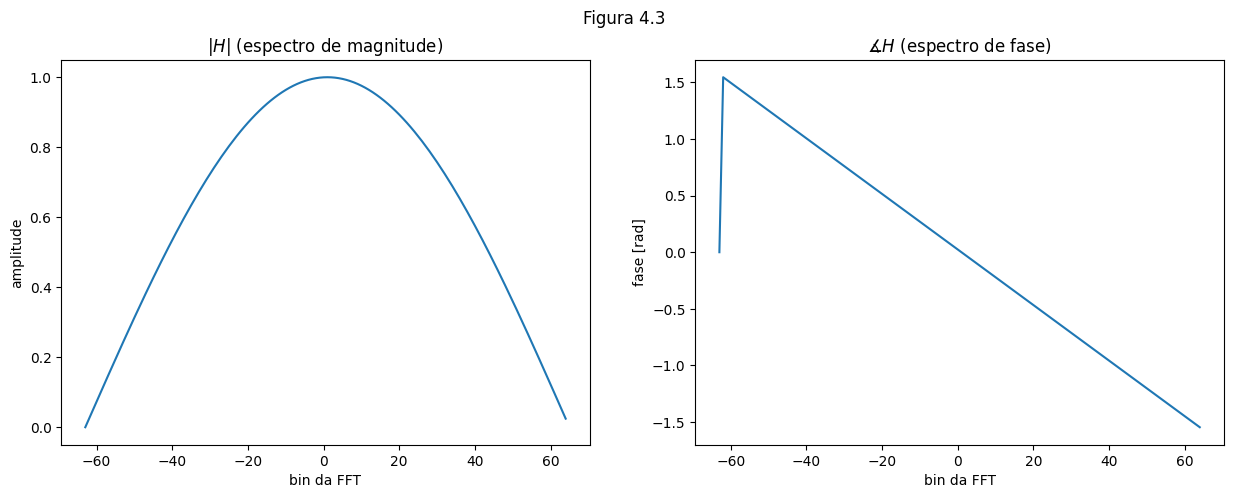

In [83]:
N = 128;
h = np.zeros(N);
h[0] = h[1] = 0.5;

H = np.fft.fft(h)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].set_title('$|H|$ (espectro de magnitude)')
ax[0].set_xlabel('bin da FFT')
ax[0].set_ylabel('amplitude')
ax[0].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(np.abs(H)))
# ax[0].plot(np.arange(-N//2+1,N//2+1),np.roll(np.abs(H), N//2)) # equivalente ao fftshift

ax[1].set_title('$\measuredangle H$ (espectro de fase)');
ax[1].set_xlabel('bin da FFT');
ax[1].set_ylabel('fase [rad]')
ax[1].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(np.angle(H)))

fig.suptitle("Figura 4.3")
plt.show()

Havíamos calculado a resposta em frequência do filtro da média como

$$H_k = \cos(2\pi k/N) e^{-i\pi k/N}$$

ou equivalentemente

$$M_hE_{N,k} = \cos(2\pi k/N) e^{-i\pi k/N}E_{N,k}$$

logo $\measuredangle H_k = (-\pi /N)k$ (resposta linear em $k$), com atraso de grupo correspondente a $$\frac{N\measuredangle H_k}{2\pi k} = \frac{-N\pi/N}{2\pi} = -\frac{1}{2}\ \mbox{amostra.}$$

Isso é intuitivo ao considerarmos que o sinal de saída é uma média entre o sinal original e o sinal atrasado em 1 amostra:

$$y_n = \frac{1}{2}x_n +\frac{1}{2}x_{n-1}\\ y = \frac{1}{2}\left(\begin{array}{c}(x_0,x_1,\ldots,x_{N-1})\\+\\(x_{-1},x_0,\ldots,x_{N-2})\end{array}\right)\\ \phantom{y} = \left(x_{-\frac{1}{2}},x_{\frac{1}{2}},\ldots,x_{N-1-\frac{1}{2}}\right)$$
onde os índices fracionários representam a interpolação linear do sinal.

### Resposta ao impulso

Considere o vetor $h\in\mathbb{C}^N$ associado à equação $y=x*h$, e seja a entrada $x=\delta$ onde

\begin{equation*}
	\delta = \left\{\begin{array}{ll}
		1 & \text{ se }n=0 \\
		0 & \text{ c.c.} \\
	\end{array}\right.
\end{equation*}

Esse sinal $\delta$ é chamado de **impulso unitário**.

 A resposta do filtro a esse impulso será $y = \delta*h$, onde

\begin{align*}
	y_n &= \sum\limits_{k=0}^{N-1}\delta_kh_{n-k}\\
	&= h_n
\end{align*}

Assim, vemos que $\delta$ é o **elemento neutro** da operação de convolução, e $h$ é denominado **resposta ao impulso** associada ao filtro.

In [103]:
def test_elemento_neuro(N):
    sigma = np.zeros(N, dtype='complex')
    sigma[0] = 1
    
    x = np.random.rand(N)
    
    res = conv1(sigma, x)
    assert np.allclose(x, res) == True, 'Teste falhou'
    print('Teste passou')
    
test_elemento_neuro(30)

Teste passou


### Resposta em Frequência

Denominamos de **resposta em frequência** ao vetor $H = DFT(h)$.

Lembre que cada coeficiente $H_k\in\mathbb{C}$ modifica a componente de frequência $k$ de um sinal da entrada $x$ de acordo com o teorema da convolução

$$y = x*h \implies Y_k=H_kX_k.$$

Denominamos de **resposta em magnitude** ao vetor $|H|\in\mathbb{R}^N$, e de **resposta em fase** ao vetor $\measuredangle H\in\mathbb{R}^N$, levando em consideração que

$$Y_k = H_kX_k = |H_k|e^{i\measuredangle H_k}|X_k|e^{i\measuredangle X_k}=|H_k||X_k|e^{i(\measuredangle H_k+\measuredangle X_k)},$$

ou seja, que as magnitudes das componentes da entrada são multiplicadas por $|H_k|$ e as fases são acrescidas de $\measuredangle H_k$.

### Desenho de filtros

Em princípio, podemos definir arbitrariamente qualquer resposta em frequência $H\in\mathbb{C}^N$ desejada, obtendo a resposta ao impulso pela expressão $h = IDFT(H)$, de tal forma que que $y=x*h$ terá espectro $Y_k=H_kX_k$.

Entretanto

\begin{array}{ll}
	1. & \mbox{Se}\ H\ \mbox{é um vetor qualquer, então}\ h\ \mbox{pode não ser real,}\\
    & \mbox{e com isso}\ x*h\ \mbox{também pode não ser real.}\\
    & \mbox{Lembrando que}\ h\in\mathbb{R}^N \Leftrightarrow H_k = \overline{H_{-k}}\\
	& \mbox{uma solução é definir}\ H_k\ \mbox{arbitrariamente para}\ k\le \frac{N}{2}\\
    & \mbox{e depois copiar}\ H_{N-k} = H_{-k} = \overline{H_{k}},\ \forall k>\frac{N}{2}.\\
	2. & \mbox{Normalmente o vetor}\ h = IDFT(H)\\
    &\mbox{pode conter muitos coeficientes}\ \neq 0,\\
    & \mbox{tornando o filtro computacionalmente caro.}
\end{array}

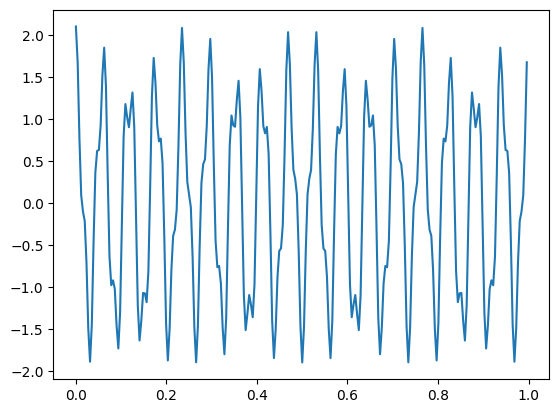

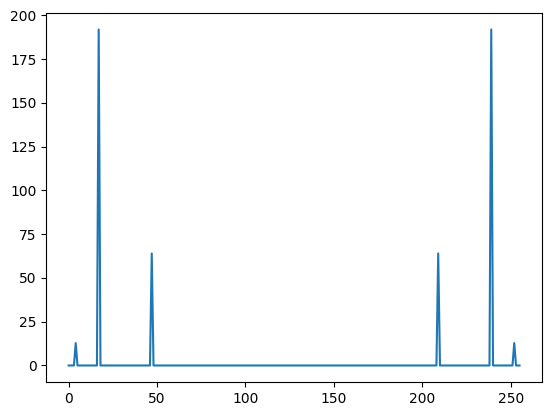

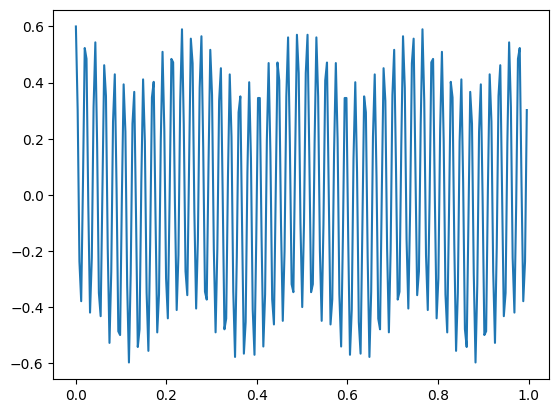

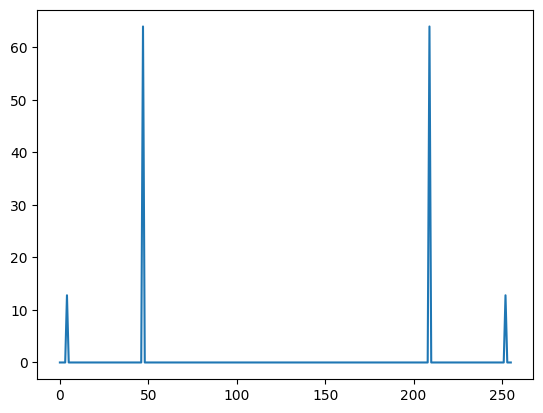

In [155]:
import math
import matplotlib.pyplot as plt
import scipy.fft as spfft
def build_signal(samples=256):
    duration = 1 # um segundo
    t = np.arange(0,duration,duration/samples)
    signal = .1*np.cos(2*math.pi*4*t) + 1.5*np.cos(2*math.pi*17*t) + 0.5*np.cos(2*math.pi*47*t)
    return signal

def plot_signal(signal):
    N = len(signal)
    t = np.arange(0,1,1/N)
    plt.plot(t, signal)

def plot_signal_freq(signal):
    X = spfft.fft(signal)
    plt.plot(X)

def filtro_retira17hz(signal):
    N = len(signal)
    H = np.ones(N, dtype='complex')
    H[17]=0
    H[-17]=0
    
    return conv1(h,signal)
    
signal = build_signal()
plot_signal(signal)
plt.figure()
plot_signal_freq(signal)
filtrado = filtro_retira17hz(signal)
plt.figure()
plot_signal(filtrado)
plt.figure()
plot_signal_freq(filtrado)

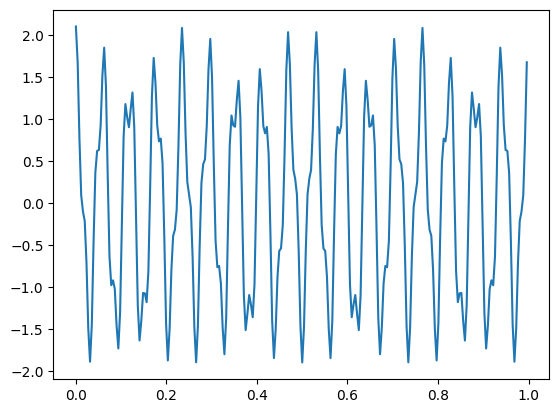

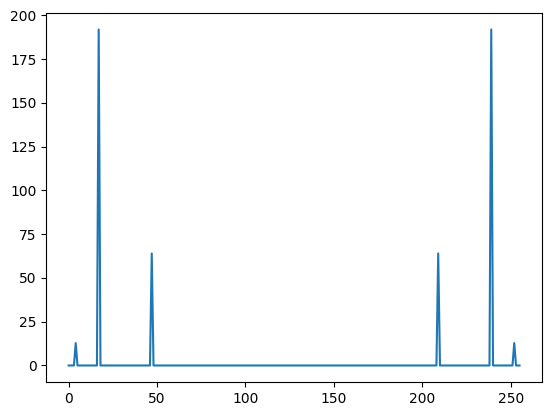

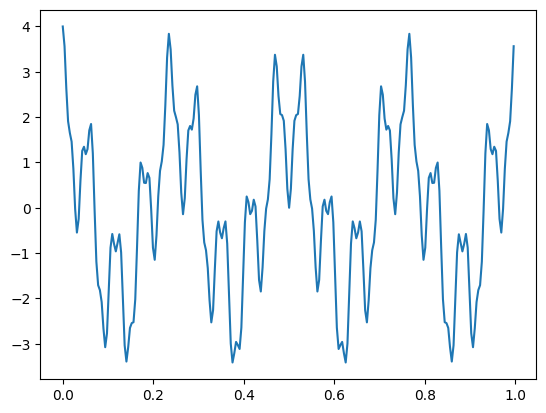

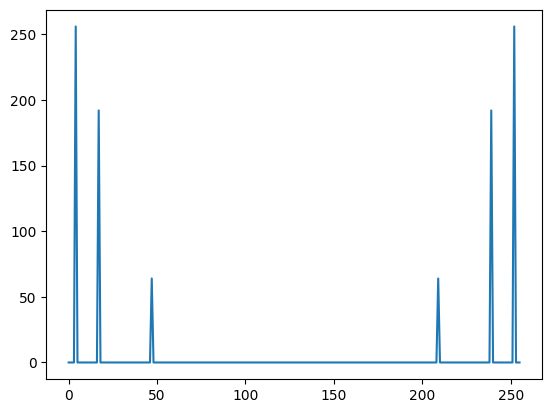

In [161]:
import math
import matplotlib.pyplot as plt
import scipy.fft as spfft
def build_signal(samples=256):
    duration = 1 # um segundo
    t = np.arange(0,duration,duration/samples)
    signal = .1*np.cos(2*math.pi*4*t) + 1.5*np.cos(2*math.pi*17*t) + 0.5*np.cos(2*math.pi*47*t)
    return signal

def plot_signal(signal):
    N = len(signal)
    t = np.arange(0,1,1/N)
    plt.plot(t, signal)

def plot_signal_freq(signal):
    X = spfft.fft(signal)
    plt.plot(X)

def filtro_amplifica4hz(signal):
    N = len(signal)
    H = np.ones(N, dtype='complex')
    H[4]=20
    H[-4]=np.conjugate(H[4])
    h = spfft.ifft(H)
    
    return conv1(h,signal)
    
signal = build_signal()
plot_signal(signal)
plt.figure()
plot_signal_freq(signal)
filtrado = filtro_amplifica4hz(signal)
plt.figure()
plot_signal(filtrado)
plt.figure()
plot_signal_freq(filtrado)

### Observação: custo computacional da convolução

\begin{array}{ll}
		1. & y_n = \sum\limits_{k=0}^{N-1}x_kh_{n-k}, n = 0, \dots, N-1\\
        &(\mbox{custo}\ \mathcal{O}(N^2))\\
		2. & y = IDFT(Y)\ \mbox{onde}\ Y_k = X_kH_k,\ k = 0, \dots, N-1\\
        &(\mbox{custo}\ \mathcal{O}(N\log N))\\
		3. & \mbox{se}\ \#h = \#\{h_n\neq 0\}\ \mbox{é pequeno}\ \left(\mathcal{O}(1)\right),\ \mbox{então calcular}\\
		& y_n = \sum\limits_{k=0}^{N-1}x_kh_{n-k} = \sum\limits_{k: h_k\neq 0}h_kx_{n-k}, n = 0, \dots, N-1\\
		& \mbox{tem custo}\ \mathcal{O}(N).
\end{array}

### Filtros eficientes (com poucos "taps")

Uma forma metafórica de imaginar o processo de filtragem é pensar no fluxo $x$ como um líquido passando por um cano:
$$\begin{array}{ll}
& \rule{10cm}{0.5pt}\\
{x\longrightarrow}\atop\ & \rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{1.75cm}{0.5pt}\hspace{0.25cm}\rule{2cm}{0.5pt}\\
&\hspace{1.75cm}\downarrow\hspace{1.75cm}\downarrow\hspace{1.75cm}\downarrow\hspace{1.75cm}\downarrow\hspace{2cm}\\
&\hspace{1.75cm}x^{(-i)}\hspace{1.2
cm}x^{(-j)}\hspace{1.2cm}x^{(-k)}\hspace{1.2cm}x^{(-l)}\hspace{2cm}\\
&\hspace{1.75cm}\cdot h_i\hspace{1.4
cm}\cdot h_j\hspace{1.4cm}\cdot h_k\hspace{1.4cm}\cdot h_l\hspace{2cm}\longrightarrow y
\end{array}$$
sendo que a saída do filtro

$$y_n = \sum\limits_{k: h_k\neq 0}h_kx_{n-k}\quad \left(\mbox{alternativamente:}\ y = \sum\limits_{k: h_k\neq 0}h_kx^{(-k)}\right)$$

poderia ser interpretada como uma mistura das cópias atrasadas ($x_{n-k}$\ , ou como um sinal $x^{(-k)}$ atrasado como um todo em $k$ amostras) da entrada, que saem por "torneiras" (*taps* em inglês) posicionadas a uma distância $k$ da entrada, com "vazão" correspondente a $h_k$.

O termo **tap** se generalizou como referência aos coeficientes não-nulos da resposta ao impulso $h$, sendo que filtros com poucos taps permitem sua implementação com custo $\mathcal{O}(1)$ por amostra, sendo considerados por isso bastante eficientes e adequados a aplicações computacionalmente intensivas (por exemplo, processamento em tempo-real).
 
Uma estratégia para deixar um filtro mais eficiente é zerar componentes de $h$ que satisfaçam $|h_m| < \epsilon$ para algum $\epsilon > 0$ escolhido, como no algoritmo de compressão estudado no capítulo 3. O resultado será um filtro aproximado, cuja distorção pode ser medida a partir das respostas em frequência antes e depois da modificação, como veremos no próximo exemplo.

### Exemplo 4.4: filtro passa-alta projetado a partir de uma resposta em frequência ideal.

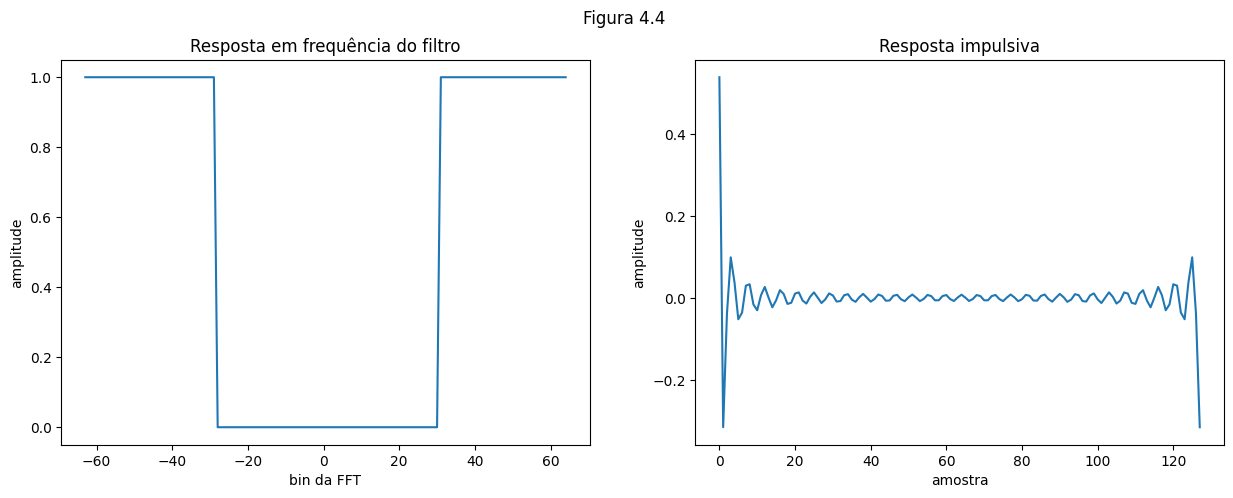

In [168]:
N = 128;
H = np.concatenate((np.zeros(30),np.ones(69),np.zeros(29)));
H2 = np.zeros(N)
H2[30:30+69] = 1

assert (H == H2).all()

h = np.real(np.fft.ifft(H))

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(H));

ax[0].set_title('Resposta em frequência do filtro');
ax[0].set_xlabel('bin da FFT');
ax[0].set_ylabel('amplitude')

ax[1].plot(h);
ax[1].set_title('Resposta impulsiva');
ax[1].set_xlabel('amostra');
ax[1].set_ylabel('amplitude')
fig.suptitle("Figura 4.4");plt.show()

### Versões computacionalmente mais "baratas" (com menos "taps") do mesmo filtro passa-alta.

In [169]:
# Os limiares abaixo são usados para "cortar" coeficientes do filtro e com isso diminuir o número de termos na equação de convolução

def plota_filtro_com_menos_taps(epsilon,h,ax,k):
    mask = (abs(h)>=epsilon) # seleciona os coeficientes acima do limiar
    ntaps = sum(mask) # calcula o número de coeficientes do filtro
    heps = h*mask # heps é o filtro simplificado com limiar epsilon
    
    # Mostra a resposta impulsiva com os coeficientes eliminados
    ax[0,k].plot(heps);
    ax[0,k].set_title("Epsilon = "+str(epsilon)+", Filtro com "+str(ntaps)+" taps")
    
    # Compara a resposta do filtro simplificado com a resposta ideal do filtro original (pontilhada)
    ax[1,k].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(np.real(np.fft.fft(heps))), label='filtro obtido')
    ax[1,k].plot(np.arange(-N//2+1,N//2+1),np.fft.fftshift(H),".", label='filtro ideal')

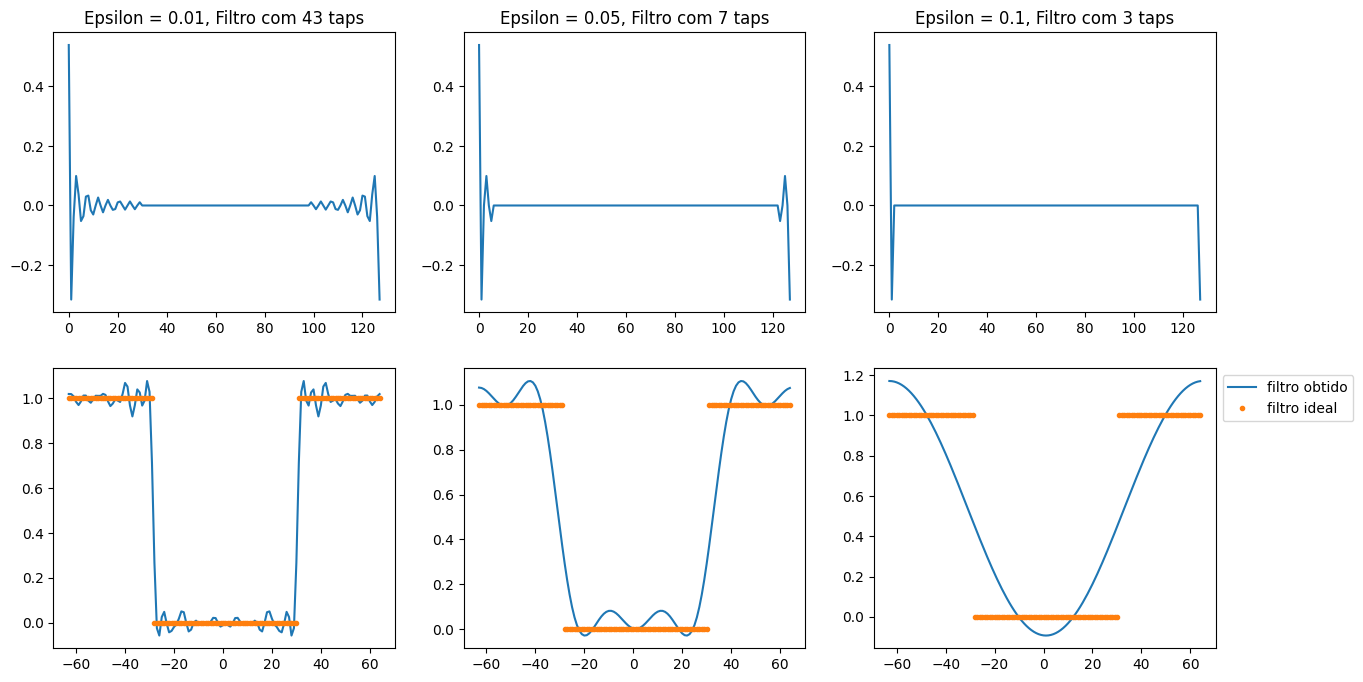

In [175]:
EPSVALS =  [ 0.01, 0.05, 0.1 ]
EPSVALS =  [ 0.01, 0.05, 0.1 ]
fig, ax = plt.subplots(2,3, figsize=(15,8))
for k in range(len(EPSVALS)): 
    plota_filtro_com_menos_taps(EPSVALS[k],h,ax,k)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));plt.show()

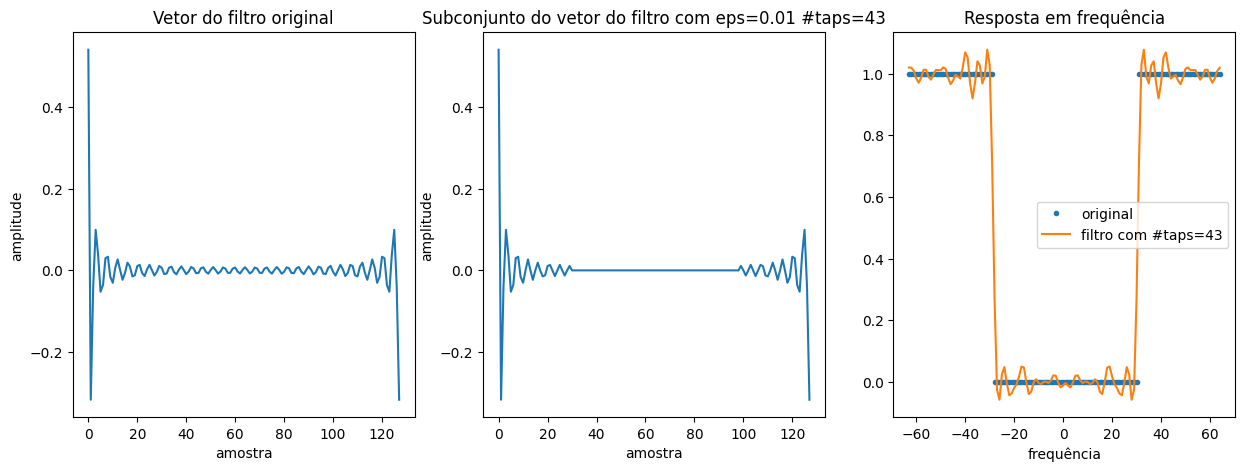

<Figure size 640x480 with 0 Axes>

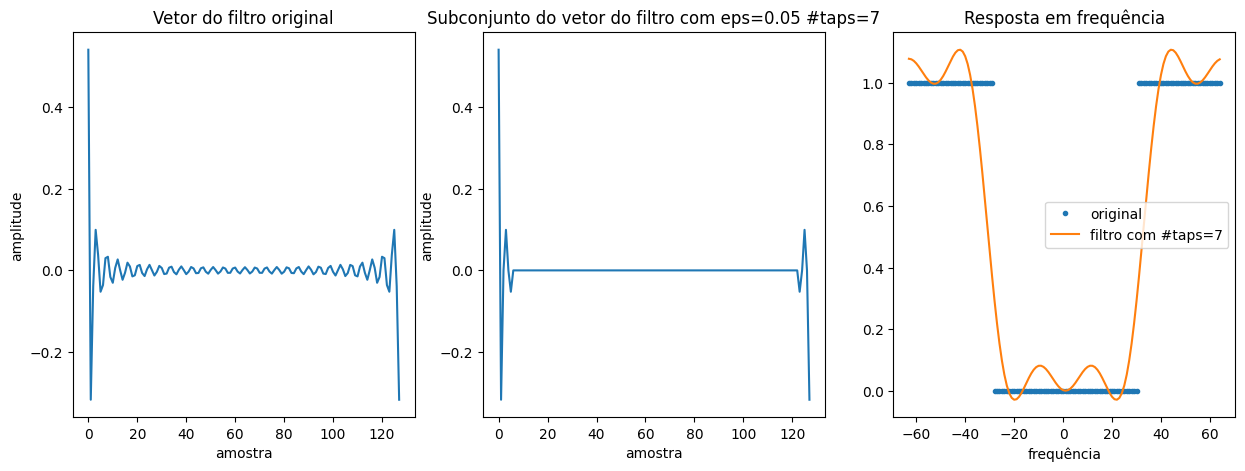

<Figure size 640x480 with 0 Axes>

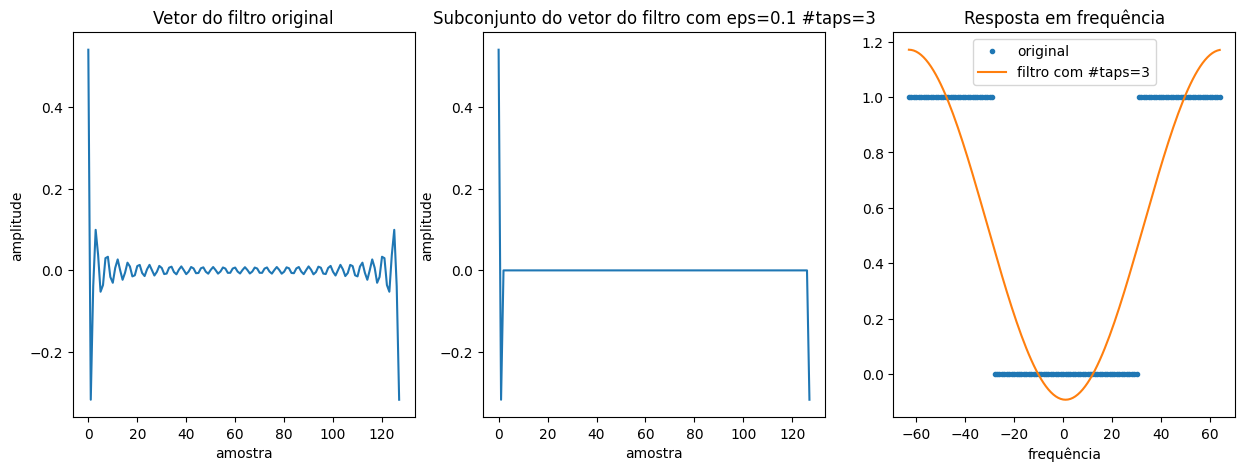

<Figure size 640x480 with 0 Axes>

In [228]:
import scipy.fft as spfft
def plota_vetor_do_filtro_e_reposta_em_frequencia(epsilon, h):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    
    # o shift é já para centralizar os índice, como um np.roll(fft(x), N//2)
    H = spfft.fft(h)
    
    selected = abs(h)>=epsilon
    qty_selected = sum(selected)
    h_subset = selected * h
    
    H_subset = spfft.fft(h_subset)
    
    ax[0].plot(h)
    ax[0].set_title('Vetor do filtro original');
    ax[0].set_xlabel('amostra');
    ax[0].set_ylabel('amplitude')

    ax[1].plot(h_subset)
    ax[1].set_title(f'Subconjunto do vetor do filtro com eps={epsilon} #taps={qty_selected}');
    ax[1].set_xlabel('amostra');
    ax[1].set_ylabel('amplitude')    
    
    frequencias = np.arange(-N//2+1, N//2+1,1)
    ax[2].plot(frequencias,spfft.fftshift(H), '.', label='original');
    ax[2].plot(frequencias,spfft.fftshift(H_subset), label=f'filtro com #taps={qty_selected}');
    ax[2].set_title('Resposta em frequência');
    ax[2].set_xlabel('frequência');
    ax[2].legend()

    
EPSILONS = [0.01, 0.05, 0.1]
for eps in EPSILONS:
    plota_vetor_do_filtro_e_reposta_em_frequencia(eps, h)
    plt.figure()

### Colocando em perspectiva a "perfeição" da resposta em frequência do filtro original (com banda de corte nula).

Este exemplo (que não está no livro) se contrapõe à idéia de que o filtro desenhado a partir da resposta em frequência H tenha exatamente o comportamento de filtro ideal que o gráfico de H poderia sugerir.

Para este exemplo, construiremos "na mão" a resposta em magnitude do filtro H para funções "básicas" do tipo $\cos(2\pi f\frac{n}{N})$, inicialmente para frequências do tipo $f=0,1,...,N-1$, e posteriormente para outras frequências intermediárias.

#### Computa a resposta em magnitude para as frequências f=0,1,2,...,N-1

In [229]:
FREQS = np.arange(-N//2+1,N//2+1,1)
R = [ 0 ] * len(FREQS)
t = np.arange(N)
for k in range(N):
    # cria função básica de frequência k
    x = np.cos(2*np.pi*FREQS[k]*t/N)
    # filtra por h
    y = np.real(np.fft.ifft(np.fft.fft(x)*H))
    # constrói gráfico de magnitude da resposta
    # (fator de escala da saída do filtro)
    R[k] = np.linalg.norm(y)/np.linalg.norm(x)

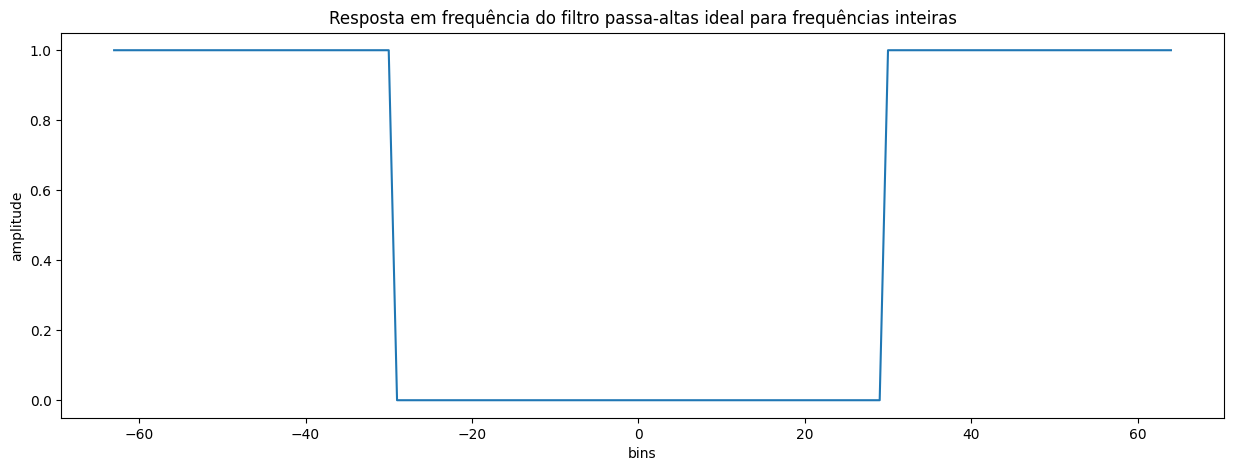

In [210]:
# Mostra o gráfico da resposta de magnitude.
plt.figure(figsize=(15,5));
plt.title("Resposta em frequência do filtro passa-altas ideal para frequências inteiras")
plt.plot(FREQS,R);
plt.xlabel("bins");
plt.ylabel('amplitude');
plt.show()

In [232]:
len(R)

128

### Repete a mesma construção com frequências não-inteiras
#### Observe que a única diferença do código abaixo é que agora as frequências são f=0,0.1,0.2,...,N-1

In [234]:
FREQS = np.arange(-N//2+1,N//2+1,0.1)
R = [ 0 ] * len(FREQS)
t = np.arange(N)
for k in range(len(FREQS)):
    # cria função básica de frequência k
    x = np.cos(2*np.pi*FREQS[k]*t/N)
    # filtra por h
    y = np.real(np.fft.ifft(np.fft.fft(x)*H))
    # constrói gráfico de magnitude da resposta
    # (fator de escala da saída do filtro)
    R[k] = np.linalg.norm(y)/np.linalg.norm(x)

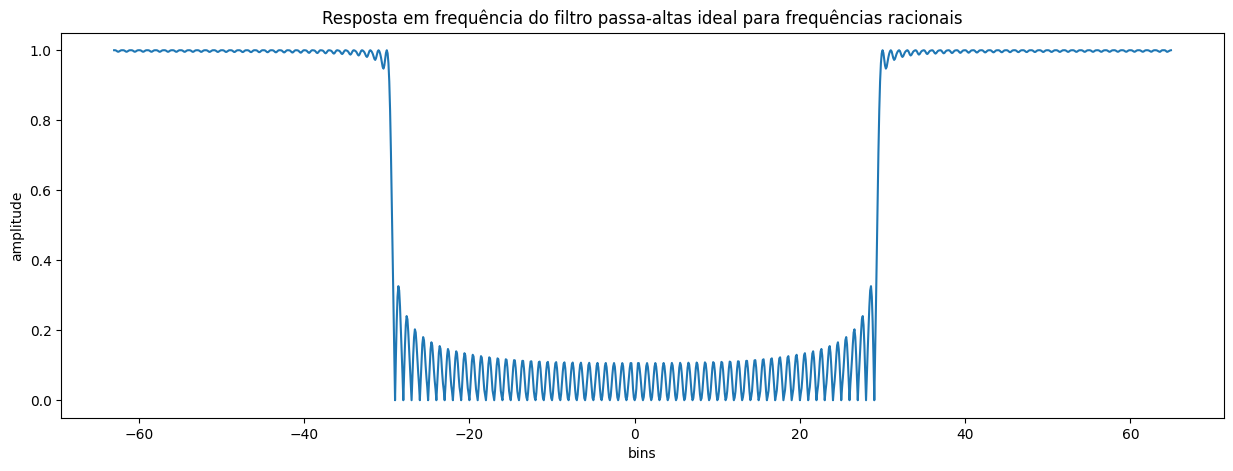

In [236]:
# Mostra o gráfico da resposta de magnitude.
plt.figure(figsize=(15,5));
plt.title("Resposta em frequência do filtro passa-altas ideal para frequências racionais")
plt.plot(FREQS,R);
plt.xlabel("bins");
plt.ylabel('amplitude');
plt.show()